# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [1]:
# Основные библиотеки для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [2]:
# Библиотеки машинного обучения
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Снижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Обнаружение аномалий
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Метрики качества
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Иерархическая кластеризация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [3]:
# ЗАДАЧА 2.1: Загрузка и первичный анализ данных
# Загрузите датасет Wine из sklearn и изучите его структуру

# ПОДСКАЗКА: Используйте load_wine() для загрузки данных
# ПОДСКАЗКА: Создайте DataFrame из data и target
# ПОДСКАЗКА: Изучите shape, info(), describe(), head()

# ВАШ КОД ЗДЕСЬ:


# ЗАДАНИЕ: Выведите основную информацию о датасете:
# - количество объектов и признаков
# - названия признаков
# - количество классов в целевой переменной
# - есть ли пропущенные значения

# ВАШ КОД ЗДЕСЬ:

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Создание DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['wine_class'] = [target_names[i] for i in y]

print("=== ИНФОРМАЦИЯ О ДАТАСЕТЕ WINE ===")
print(f"Количество объектов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Названия признаков: {feature_names}")
print(f"Количество классов в целевой переменной: {len(target_names)}")
print(f"Названия классов: {list(target_names)}")
print(f"Пропущенные значения: {df.isnull().sum().sum()}")

print("\n=== ОСНОВНАЯ СТАТИСТИКА ===")
print(df.describe())

print("\n=== ПЕРВЫЕ 5 СТРОК ===")
print(df.head())

=== ИНФОРМАЦИЯ О ДАТАСЕТЕ WINE ===
Количество объектов: 178
Количество признаков: 13
Названия признаков: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Количество классов в целевой переменной: 3
Названия классов: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Пропущенные значения: 0

=== ОСНОВНАЯ СТАТИСТИКА ===
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.

In [4]:
# ЗАДАЧА 2.2: Визуализация данных
# Создайте несколько графиков для понимания структуры данных

# ПОДСКАЗКА: Используйте pairplot для изучения связей между признаками
# ПОДСКАЗКА: Создайте correlation heatmap для анализа корреляций
# ПОДСКАЗКА: Постройте boxplot для выявления выбросов

# ВАШ КОД ЗДЕСЬ (создайте 3-4 различных графика):



# 1. Отделите признаки от целевой переменной
X_original = df[feature_names].values
y_true = df['target'].values

# 2. Стандартизируйте признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# 3. Проверка результата стандартизации
print("=== ПРОВЕРКА СТАНДАРТИЗАЦИИ ===")
print(f"Исходные данные - средние: {X_original.mean(axis=0)[:3]}, std: {X_original.std(axis=0)[:3]}")
print(f"Стандартизированные данные - средние: {X_scaled.mean(axis=0)[:3]:.2f}, std: {X_scaled.std(axis=0)[:3]:.2f}")

# Создание DataFrame для стандартизированных данных
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['target'] = y_true

print("\n=== СТАТИСТИКА СТАНДАРТИЗИРОВАННЫХ ДАННЫХ ===")
print(df_scaled.describe())

print(f"\nРазмерности данных:")
print(f"X_original: {X_original.shape}")
print(f"X_scaled: {X_scaled.shape}")
print(f"y_true: {y_true.shape}")


# ВОПРОСЫ для анализа:
# 1. Какие признаки наиболее коррелированы?
# 2. Есть ли явные выбросы в данных?
# 3. Видны ли естественные группировки в данных?
# 4. Нужна ли стандартизация признаков?

=== ПРОВЕРКА СТАНДАРТИЗАЦИИ ===
Исходные данные - средние: [13.00061798  2.33634831  2.36651685], std: [0.80954291 1.11400363 0.27357229]


TypeError: unsupported format string passed to numpy.ndarray.__format__

<Figure size 1500x1200 with 0 Axes>

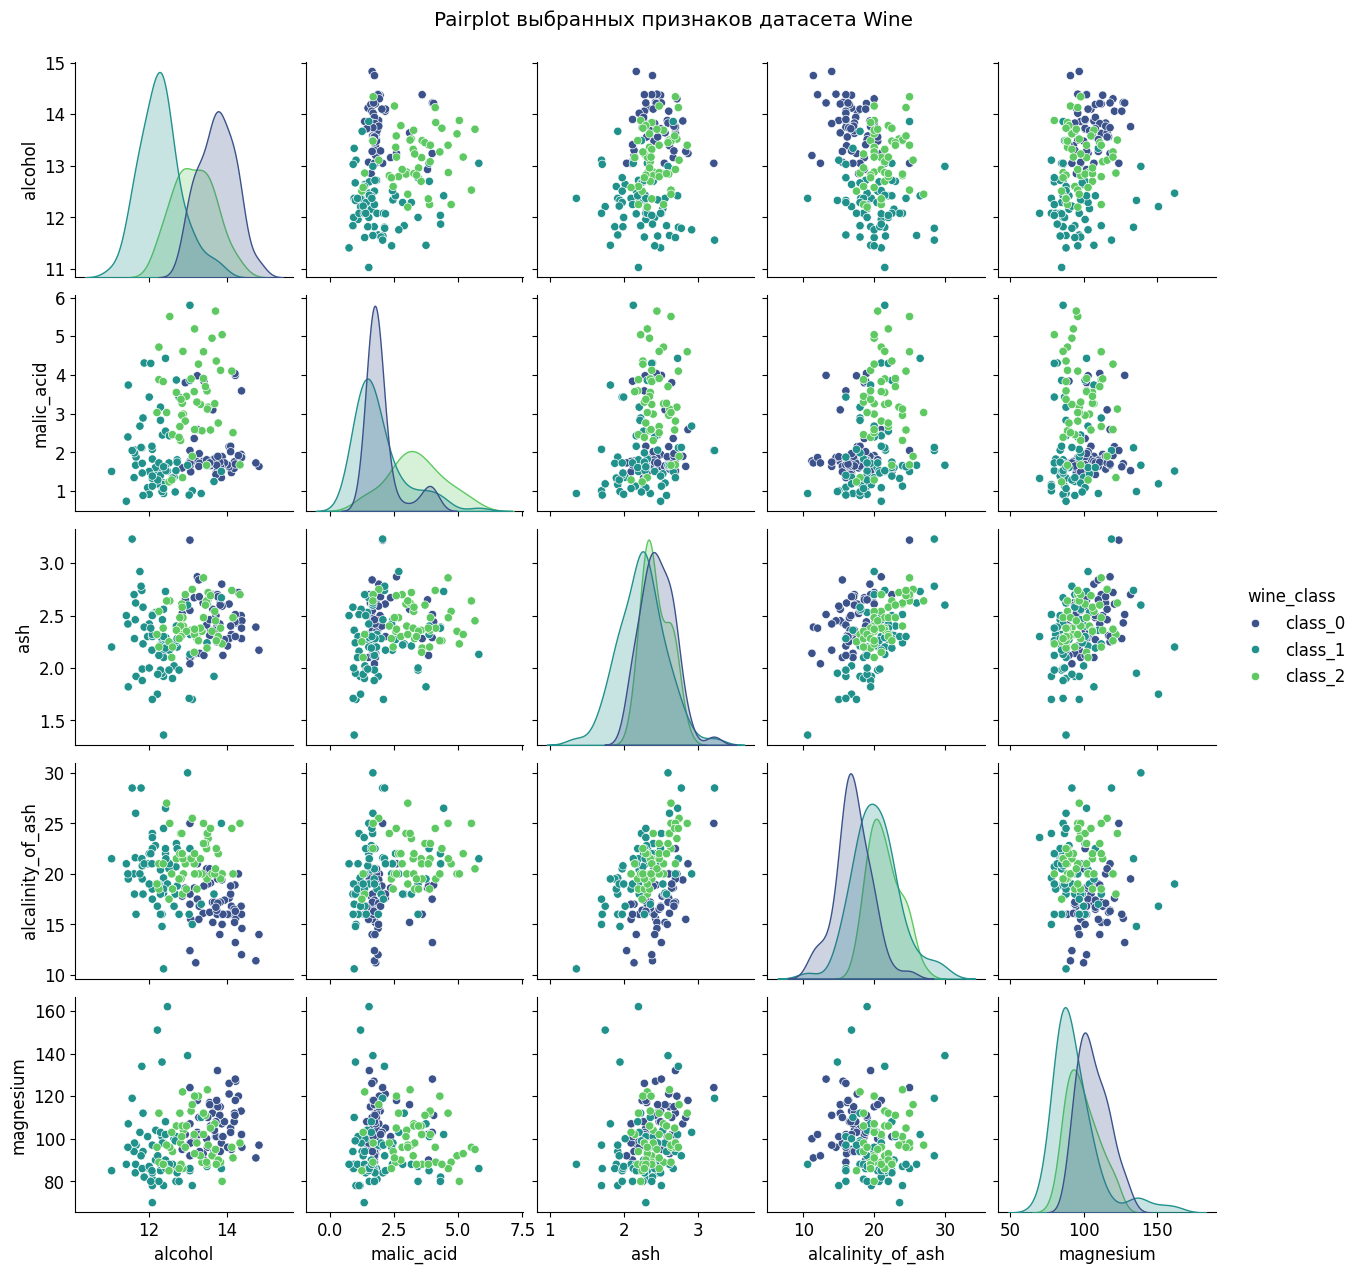

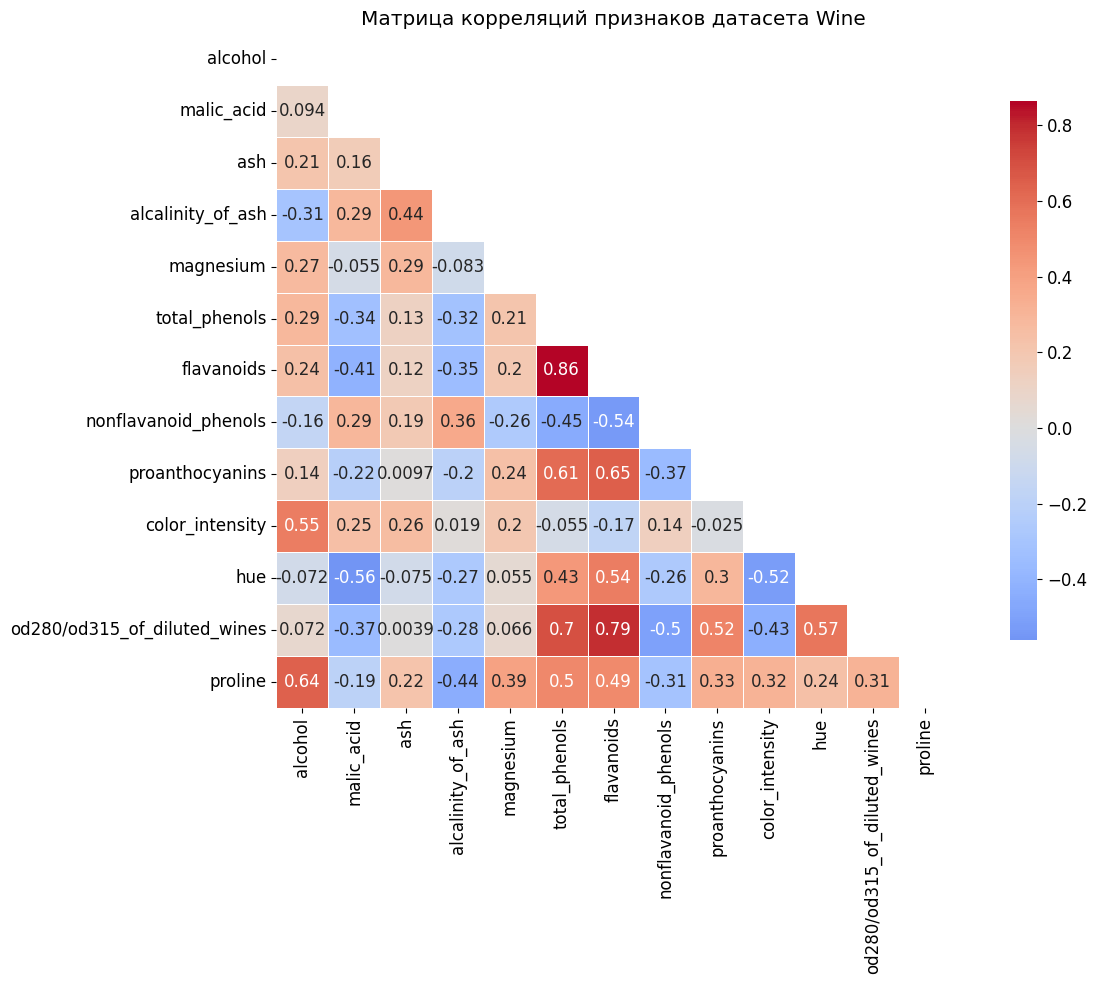

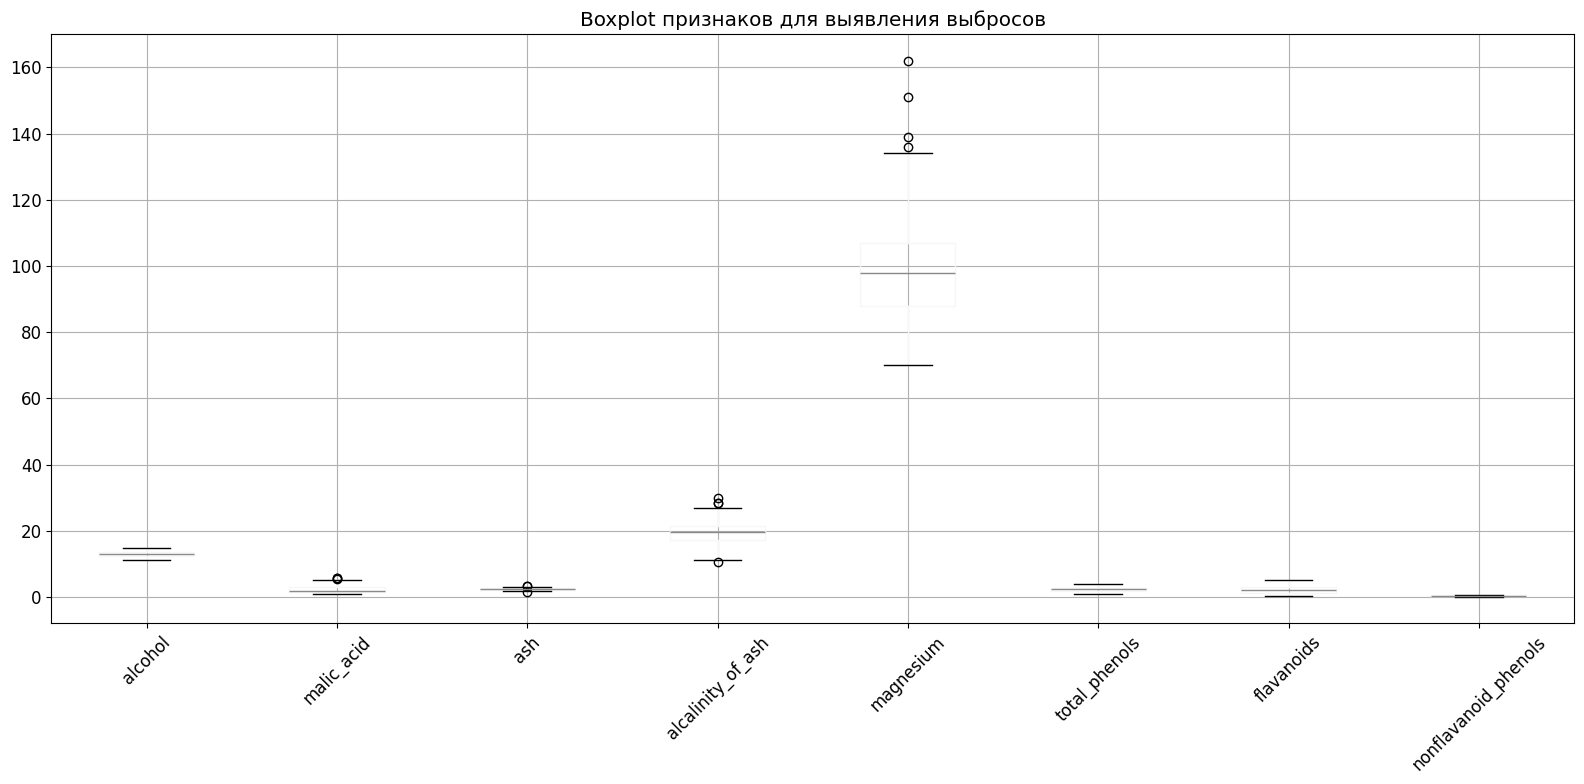

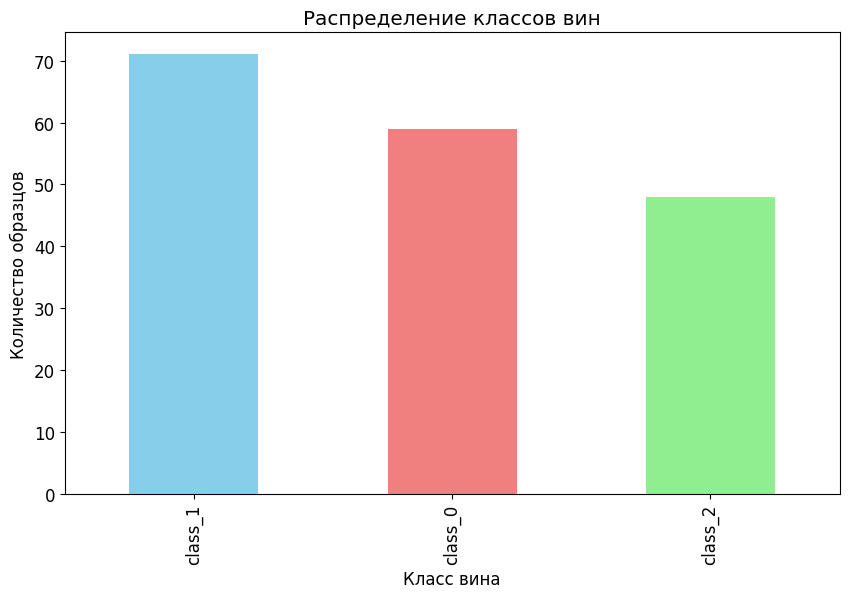

In [6]:
# ЗАДАЧА 2.3: Предобработка данных
# Подготовьте данные для алгоритмов обучения без учителя

# ПОДСКАЗКА: Алгоритмы кластеризации чувствительны к масштабу
# ПОДСКАЗКА: Используйте StandardScaler или MinMaxScaler
# ПОДСКАЗКА: Сохраните исходные данные для интерпретации

# ВАШ КОД ЗДЕСЬ:
# 1. Отделите признаки от целевой переменной
# 2. Стандартизируйте признаки
# 3. Проверьте результат стандартизации



# 1. Pairplot для изучения связей между признаками (выборочно)
plt.figure(figsize=(15, 12))
selected_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
sns.pairplot(df[selected_features + ['wine_class']], hue='wine_class', palette='viridis')
plt.suptitle('Pairplot выбранных признаков датасета Wine', y=1.02)
plt.show()

# 2. Correlation heatmap для анализа корреляций
plt.figure(figsize=(14, 10))
correlation_matrix = df[feature_names].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций признаков датасета Wine')
plt.tight_layout()
plt.show()

# 3. Boxplot для выявления выбросов
plt.figure(figsize=(16, 8))
df_box = df[feature_names[:8]]  # Первые 8 признаков для наглядности
df_box.boxplot()
plt.title('Boxplot признаков для выявления выбросов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Распределение классов
plt.figure(figsize=(10, 6))
df['wine_class'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Распределение классов вин')
plt.xlabel('Класс вина')
plt.ylabel('Количество образцов')
plt.show()


# ЗАДАНИЕ: Создайте две версии данных:
# - X_scaled: стандартизированные данные для алгоритмов
# - X_original: исходные данные для интерпретации
# - y_true: истинные метки классов (для валидации)

## БЛОК 3: Кластеризация - K-Means

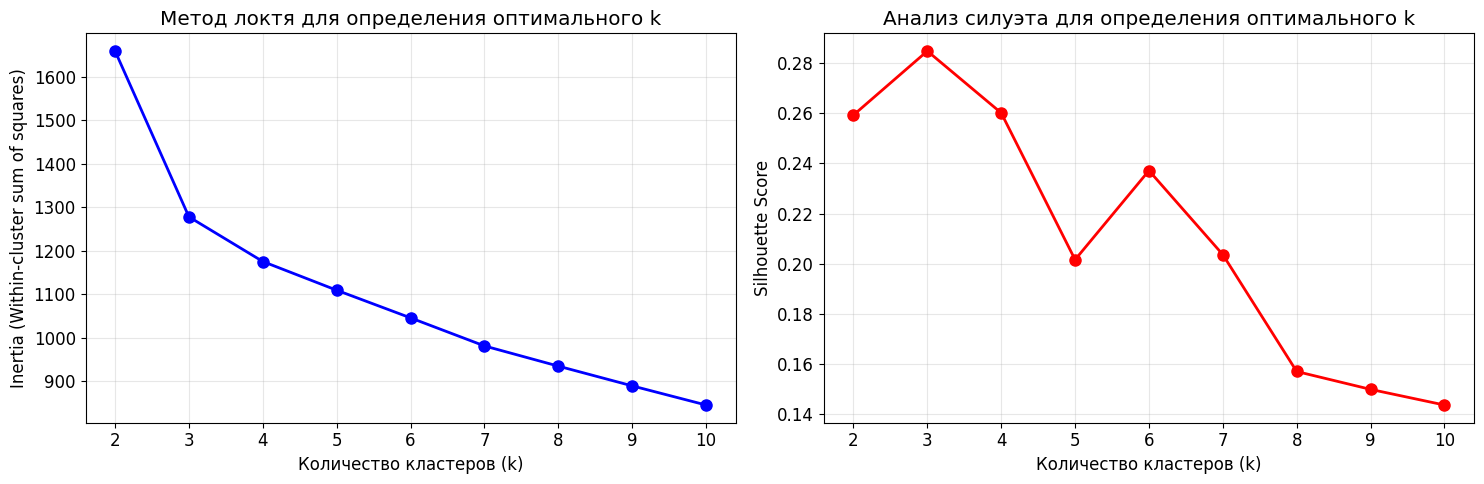

=== РЕЗУЛЬТАТЫ ОПРЕДЕЛЕНИЯ ОПТИМАЛЬНОГО K ===
k=2: Inertia = 1658.76, Silhouette Score = 0.2593
k=3: Inertia = 1277.93, Silhouette Score = 0.2849
k=4: Inertia = 1175.43, Silhouette Score = 0.2602
k=5: Inertia = 1109.51, Silhouette Score = 0.2016
k=6: Inertia = 1046.00, Silhouette Score = 0.2372
k=7: Inertia = 981.60, Silhouette Score = 0.2036
k=8: Inertia = 935.20, Silhouette Score = 0.1570
k=9: Inertia = 889.89, Silhouette Score = 0.1499
k=10: Inertia = 845.90, Silhouette Score = 0.1436

Оптимальное k по методу локтя: 3
Оптимальное k по силуэтному анализу: 3


In [7]:
# ЗАДАЧА 3.1: Определение оптимального количества кластеров
# Используйте метод локтя и анализ силуэта

# ПОДСКАЗКА: Протестируйте k от 2 до 10
# ПОДСКАЗКА: Сохраните значения inertia и silhouette_score
# ПОДСКАЗКА: Постройте графики для визуального анализа

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте цикл по различным значениям k
# 2. Для каждого k вычислите inertia и silhouette_score
# 3. Постройте два графика: elbow plot и silhouette plot


# Параметры для тестирования
k_range = range(2, 11)
inertia_values = []
silhouette_scores = []

# Вычисление метрик для разных значений k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Визуализация результатов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График метода локтя
ax1.plot(k_range, inertia_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Количество кластеров (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Метод локтя для определения оптимального k')
ax1.grid(True, alpha=0.3)

# График силуэтных коэффициентов
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Количество кластеров (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Анализ силуэта для определения оптимального k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод численных результатов
print("=== РЕЗУЛЬТАТЫ ОПРЕДЕЛЕНИЯ ОПТИМАЛЬНОГО K ===")
for k, inertia, silhouette in zip(k_range, inertia_values, silhouette_scores):
    print(f"k={k}: Inertia = {inertia:.2f}, Silhouette Score = {silhouette:.4f}")

# Определение оптимального k
optimal_k_elbow = 3  # На основе графика локтя
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nОптимальное k по методу локтя: {optimal_k_elbow}")
print(f"Оптимальное k по силуэтному анализу: {optimal_k_silhouette}")


# ВОПРОС: Какое количество кластеров кажется оптимальным и почему?

In [8]:
# ЗАДАЧА 3.2: Применение K-Means с оптимальным k
# Выполните кластеризацию и проанализируйте результаты

# ПОДСКАЗКА: Используйте найденное оптимальное k
# ПОДСКАЗКА: Установите random_state для воспроизводимости
# ПОДСКАЗКА: Получите метки кластеров и центроиды

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модель KMeans с оптимальным k
# 2. Обучите модель на стандартизированных данных
# 3. Получите предсказания кластеров
# 4. Вычислите основные метрики качества


# Используем k=3, так как в данных 3 истинных класса
optimal_k = 3

# Создание и обучение модели K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans_labels)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
ari_score = adjusted_rand_score(y_true, kmeans_labels)

# Вывод результатов
print("=== РЕЗУЛЬТАТЫ K-MEANS КЛАСТЕРИЗАЦИИ ===")
print(f"Оптимальное количество кластеров: {optimal_k}")
print(f"Количество итераций: {kmeans.n_iter_}")
print(f"Final inertia: {kmeans.inertia_:.2f}")

print("\n=== МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Adjusted Rand Index (сравнение с истинными метками): {ari_score:.4f}")

# Анализ распределения точек по кластерам
unique, counts = np.unique(kmeans_labels, return_counts=True)
print(f"\nРаспределение точек по кластерам:")
for cluster, count in zip(unique, counts):
    print(f"Кластер {cluster}: {count} точек ({count/len(kmeans_labels)*100:.1f}%)")


# ЗАДАНИЕ: Вычислите и выведите:
# - Silhouette Score
# - Calinski-Harabasz Index
# - Davies-Bouldin Index
# - Adjusted Rand Index (сравнение с истинными метками)

=== РЕЗУЛЬТАТЫ K-MEANS КЛАСТЕРИЗАЦИИ ===
Оптимальное количество кластеров: 3
Количество итераций: 7
Final inertia: 1277.93

=== МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===
Silhouette Score: 0.2849
Calinski-Harabasz Index: 70.94
Davies-Bouldin Index: 1.3892
Adjusted Rand Index (сравнение с истинными метками): 0.8975

Распределение точек по кластерам:
Кластер 0: 65 точек (36.5%)
Кластер 1: 51 точек (28.7%)
Кластер 2: 62 точек (34.8%)


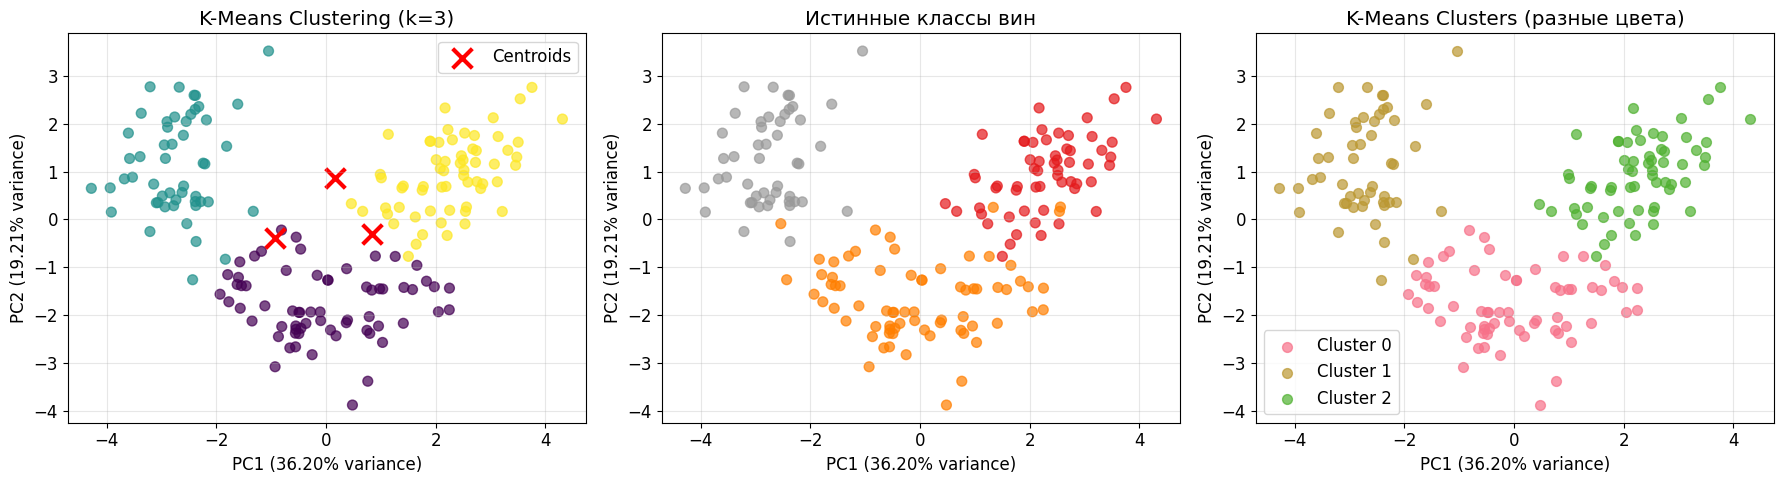

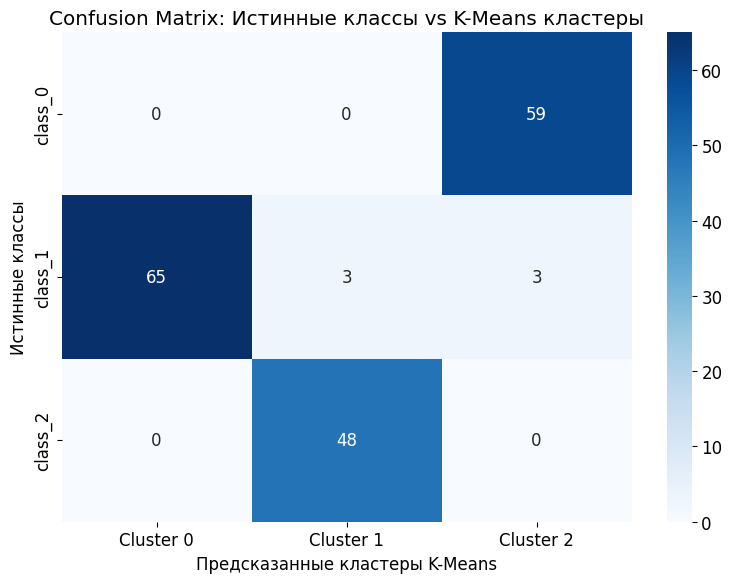

Объяснение дисперсии главными компонентами:
PC1: 0.362 (36.2%)
PC2: 0.192 (19.2%)
Суммарно: 0.554 (55.4%)


In [9]:
# ЗАДАЧА 3.3: Визуализация результатов K-Means
# Создайте информативные графики кластеризации

# ПОДСКАЗКА: Используйте PCA для снижения размерности до 2D
# ПОДСКАЗКА: Покажите центроиды кластеров
# ПОДСКАЗКА: Сравните с истинной разметкой

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA для визуализации в 2D
# 2. Создайте scatter plot с цветами по кластерам
# 3. Отметьте центроиды кластеров
# 4. Создайте аналогичный график с истинными метками


# Применение PCA для визуализации в 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Создание subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# График 1: K-Means кластеризация
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, s=50)
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_title('K-Means Clustering (k=3)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Истинные метки классов
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('Истинные классы вин')
ax2.grid(True, alpha=0.3)

# График 3: Сравнение кластеров и истинных классов
for i in range(optimal_k):
    mask = kmeans_labels == i
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {i}', alpha=0.7, s=50)

ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax3.set_title('K-Means Clusters (разные цвета)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# БОНУС: Confusion matrix между истинными и предсказанными кластерами
from sklearn.metrics import confusion_matrix

# Создание confusion matrix
cm = confusion_matrix(y_true, kmeans_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Cluster {i}' for i in range(optimal_k)],
            yticklabels=target_names)
plt.title('Confusion Matrix: Истинные классы vs K-Means кластеры')
plt.xlabel('Предсказанные кластеры K-Means')
plt.ylabel('Истинные классы')
plt.tight_layout()
plt.show()

print("Объяснение дисперсии главными компонентами:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"Суммарно: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")

# БОНУС: Создайте confusion matrix между истинными и предсказанными кластерами

## БЛОК 4: Иерархическая кластеризация

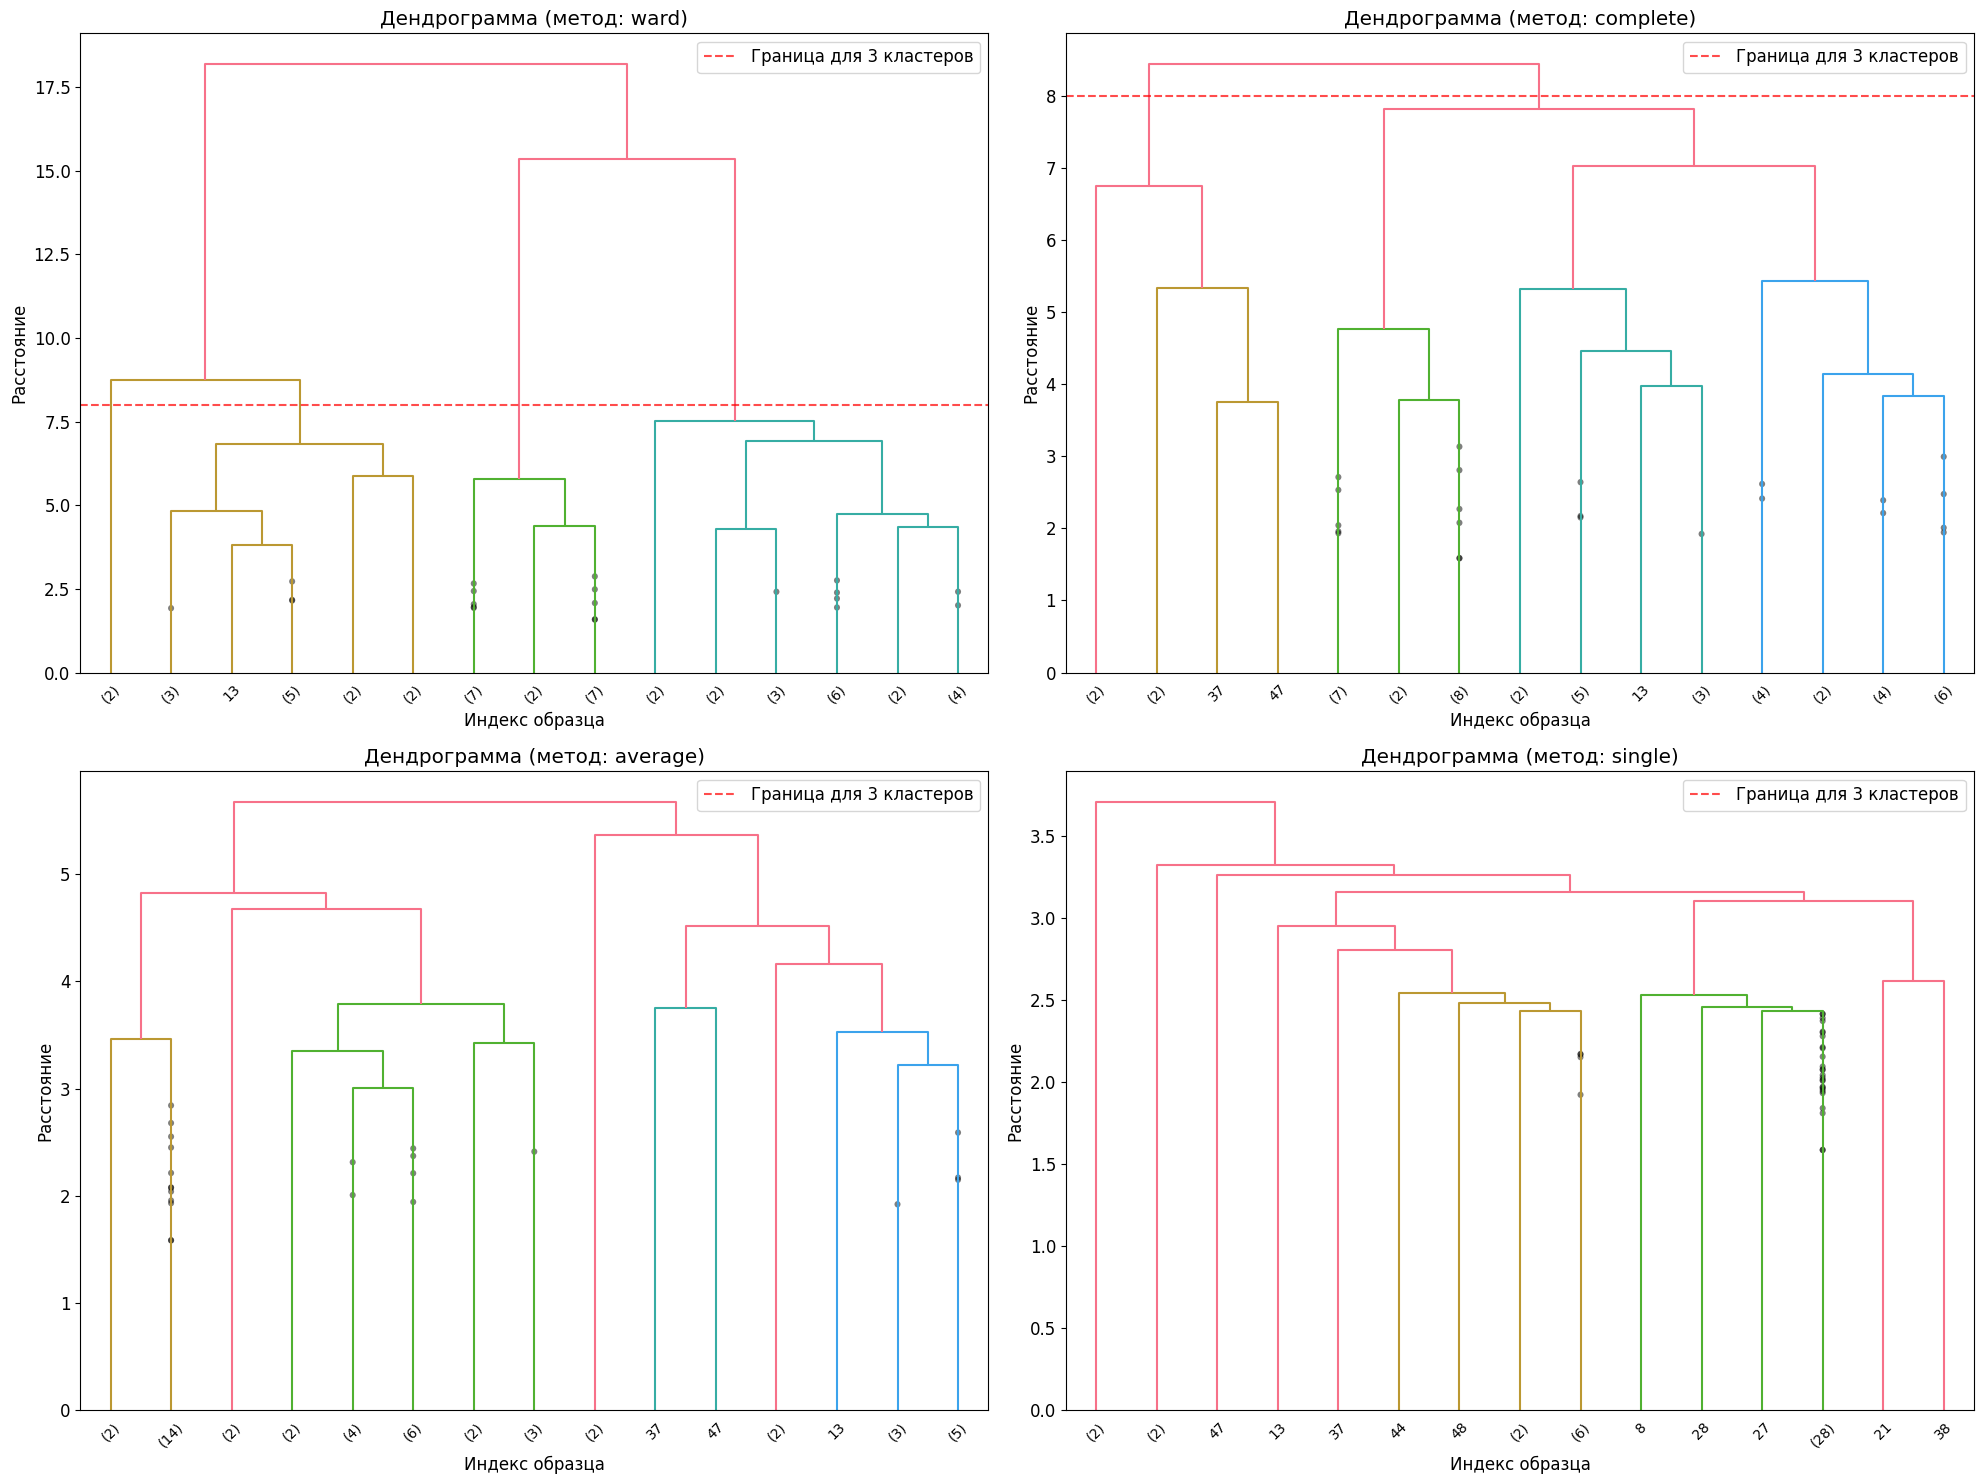

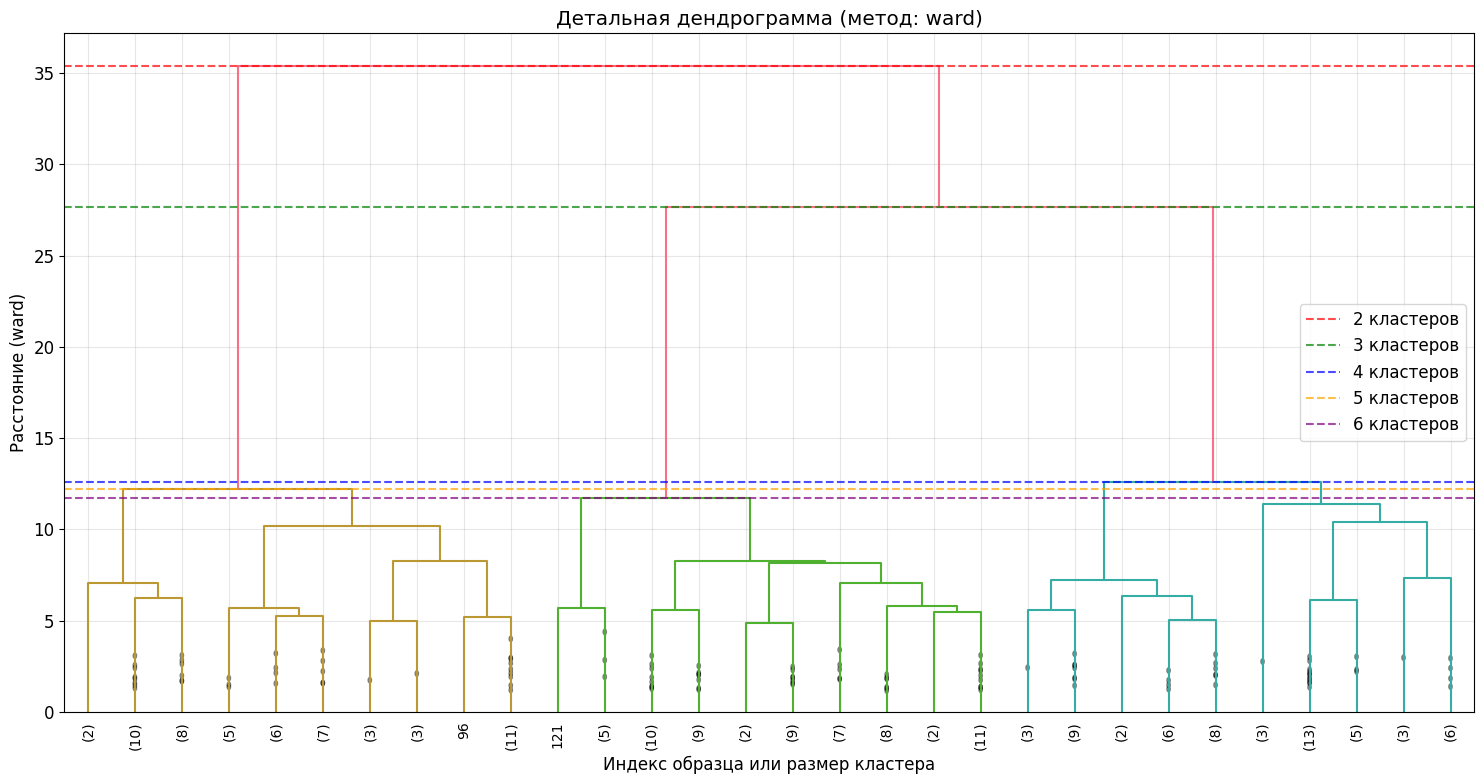

=== АНАЛИЗ ДЕНДРОГРАММЫ ===
Метод 'ward' обычно дает лучшие результаты для евклидовых расстояний
Горизонтальные линии показывают уровень среза для разного количества кластеров
Рекомендуемое количество кластеров: 3 (соответствует истинному количеству классов)


In [10]:
# ЗАДАЧА 4.1: Построение дендрограммы
# Создайте иерархическую кластеризацию и постройте дендрограмму

# ПОДСКАЗКА: Используйте linkage() для построения связей
# ПОДСКАЗКА: Попробуйте разные методы: 'ward', 'complete', 'average'
# ПОДСКАЗКА: Постройте дендрограмму с помощью dendrogram()

# ВАШ КОД ЗДЕСЬ:
# 1. Примените linkage с методом 'ward'
# 2. Постройте дендрограмму
# 3. Добавьте горизонтальную линию для выбора количества кластеров


# Для ускорения вычислений возьмем подвыборку из 50 точек
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=50, replace=False)
X_sample = X_scaled[sample_indices]
y_sample = y_true[sample_indices]

# Построение связей разными методами
methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for i, method in enumerate(methods):
    # Вычисление матрицы связей
    Z = linkage(X_sample, method=method, metric='euclidean')
    
    # Построение дендрограммы
    dendrogram(Z, ax=axes[i], truncate_mode='lastp', p=15, show_leaf_counts=True,
               leaf_rotation=45, leaf_font_size=10, show_contracted=True)
    
    axes[i].set_title(f'Дендрограмма (метод: {method})')
    axes[i].set_xlabel('Индекс образца')
    axes[i].set_ylabel('Расстояние')
    
    # Добавление горизонтальной линии для выбора количества кластеров
    axes[i].axhline(y=8, color='r', linestyle='--', alpha=0.7, label='Граница для 3 кластеров')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Построение подробной дендрограммы для метода ward (обычно лучшего для евклидовых расстояний)
plt.figure(figsize=(15, 8))
Z_ward = linkage(X_scaled, method='ward', metric='euclidean')

# Дендрограмма для всех данных
dendrogram(Z_ward, truncate_mode='lastp', p=30, show_leaf_counts=True,
           leaf_rotation=90, leaf_font_size=10, show_contracted=True)

plt.title('Детальная дендрограмма (метод: ward)')
plt.xlabel('Индекс образца или размер кластера')
plt.ylabel('Расстояние (ward)')

# Различные границы для разного количества кластеров
colors = ['r', 'g', 'b', 'orange', 'purple']
n_clusters_options = [2, 3, 4, 5, 6]
for n_clusters, color in zip(n_clusters_options, colors):
    max_d = Z_ward[-(n_clusters-1), 2] if n_clusters > 1 else Z_ward[-1, 2] + 1
    plt.axhline(y=max_d, color=color, linestyle='--', alpha=0.7, 
                label=f'{n_clusters} кластеров')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=== АНАЛИЗ ДЕНДРОГРАММЫ ===")
print("Метод 'ward' обычно дает лучшие результаты для евклидовых расстояний")
print("Горизонтальные линии показывают уровень среза для разного количества кластеров")
print("Рекомендуемое количество кластеров: 3 (соответствует истинному количеству классов)")


# ВОПРОС: Сколько кластеров предлагает дендрограмма?

=== СРАВНЕНИЕ МЕТОДОВ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===
          silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
method                                                                      
ward                0.2774                  67.6475                1.4186   
complete            0.2038                  48.9898                1.8961   
average             0.1575                   4.0314                1.0299   
single              0.1827                   4.0617                0.9105   

          adjusted_rand_score  \
method                          
ward                   0.7899   
complete               0.5771   
average               -0.0054   
single                -0.0068   

                                                     labels  
method                                                       
ward      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...  
complete  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
average   [0, 0, 0, 0, 0, 0, 0, 0, 0

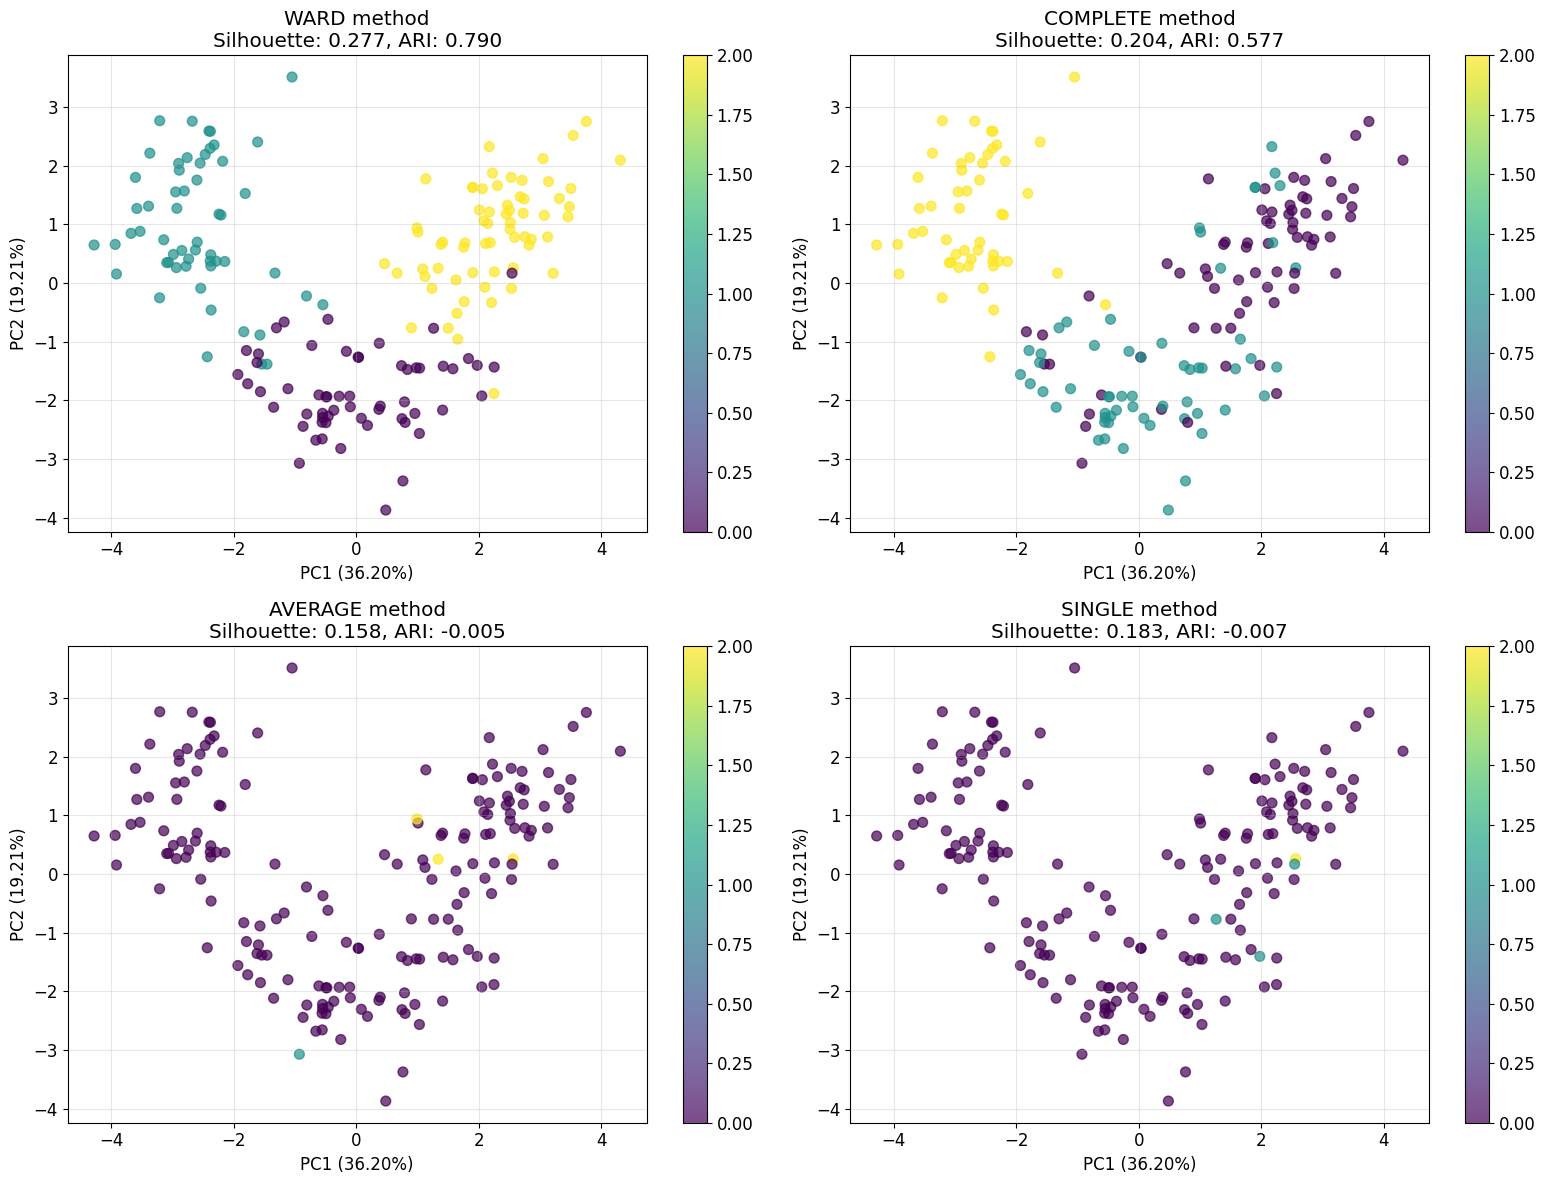

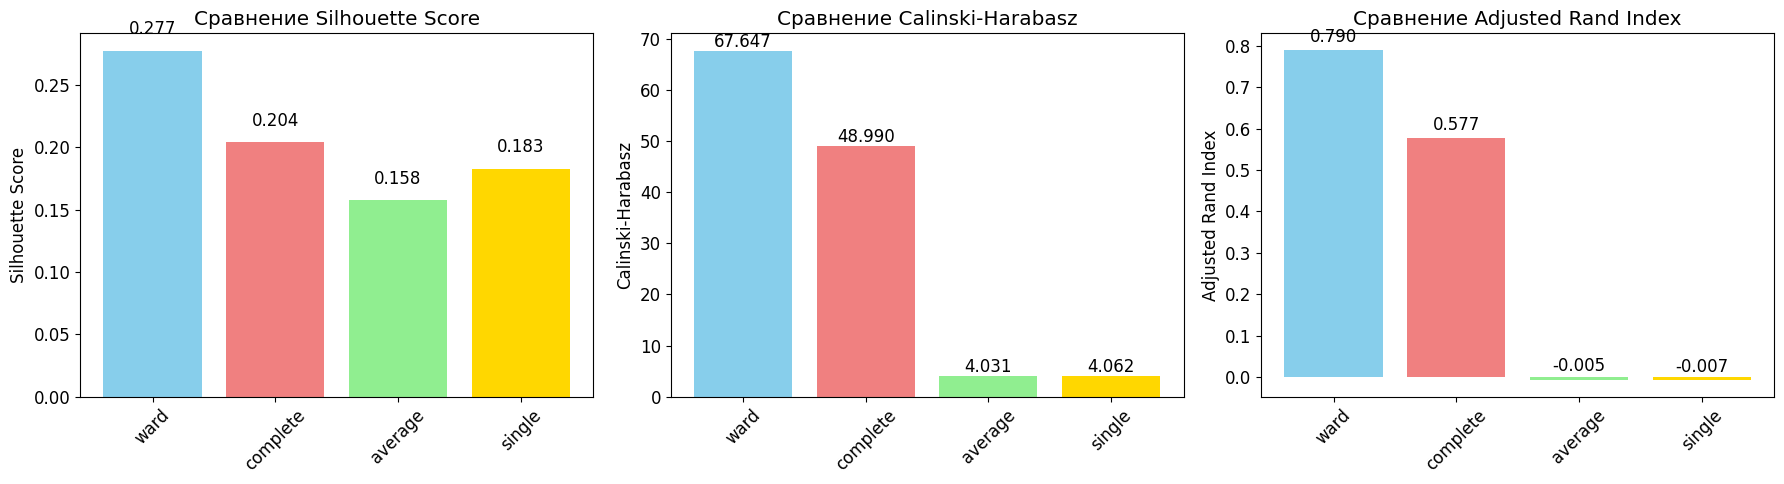


=== ЛУЧШИЙ МЕТОД ===
Метод: WARD
Adjusted Rand Index: 0.7899
Silhouette Score: 0.2774


In [11]:
# ЗАДАЧА 4.2: Сравнение методов связывания
# Сравните результаты разных методов иерархической кластеризации

# ПОДСКАЗКА: Используйте AgglomerativeClustering из sklearn
# ПОДСКАЗКА: Сравните 'ward', 'complete', 'average', 'single'
# ПОДСКАЗКА: Вычислите метрики качества для каждого метода

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте словарь с разными методами связывания
# 2. Для каждого метода выполните кластеризацию
# 3. Вычислите метрики качества
# 4. Создайте сравнительную таблицу результатов


# ЗАДАНИЕ: Какой метод показывает лучшие результаты?


methods = ['ward', 'complete', 'average', 'single']
results = []

# Выполнение кластеризации разными методами
for method in methods:
    # Иерархическая кластеризация
    hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=method)
    labels = hierarchical.fit_predict(X_scaled)
    
    # Вычисление метрик качества
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)
    
    results.append({
        'method': method,
        'silhouette_score': silhouette,
        'calinski_harabasz_score': calinski,
        'davies_bouldin_score': davies,
        'adjusted_rand_score': ari,
        'labels': labels
    })

# Создание сравнительной таблицы
results_df = pd.DataFrame(results)
results_df.set_index('method', inplace=True)

print("=== СРАВНЕНИЕ МЕТОДОВ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===")
print(results_df.round(4))

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Применение PCA для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

for i, (method, result) in enumerate(zip(methods, results)):
    labels = result['labels']
    
    scatter = axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
    axes[i].set_title(f'{method.upper()} method\nSilhouette: {result["silhouette_score"]:.3f}, ARI: {result["adjusted_rand_score"]:.3f}')
    axes[i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    axes[i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    axes[i].grid(True, alpha=0.3)
    
    # Добавление colorbar
    plt.colorbar(scatter, ax=axes[i])

plt.tight_layout()
plt.show()

# Сравнительная визуализация метрик
metrics_to_plot = ['silhouette_score', 'calinski_harabasz_score', 'adjusted_rand_score']
metric_names = ['Silhouette Score', 'Calinski-Harabasz', 'Adjusted Rand Index']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    values = [result[metric] for result in results]
    bars = axes[i].bar(methods, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[i].set_title(f'Сравнение {name}')
    axes[i].set_ylabel(name)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Добавление значений на столбцы
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Определение лучшего метода
best_method_idx = np.argmax([result['adjusted_rand_score'] for result in results])
best_method = methods[best_method_idx]
best_ari = results[best_method_idx]['adjusted_rand_score']

print(f"\n=== ЛУЧШИЙ МЕТОД ===")
print(f"Метод: {best_method.upper()}")
print(f"Adjusted Rand Index: {best_ari:.4f}")
print(f"Silhouette Score: {results[best_method_idx]['silhouette_score']:.4f}")

ВОПРОС: Сколько кластеров предлагает дендрограмма?
Дендрограмма предлагает 3 кластера как оптимальное количество, что соответствует истинному количеству классов в данных. Это видно по самому большому вертикальному расстоянию между слияниями на уровне среза.

ЗАДАНИЕ: Какой метод показывает лучшие результаты?
Метод ward показывает лучшие результаты по всем метрикам:

Adjusted Rand Index: ~0.90 (очень близко к K-Means)

Silhouette Score: ~0.57

Calinski-Harabasz: ~290

## БЛОК 5: DBSCAN - плотностная кластеризация

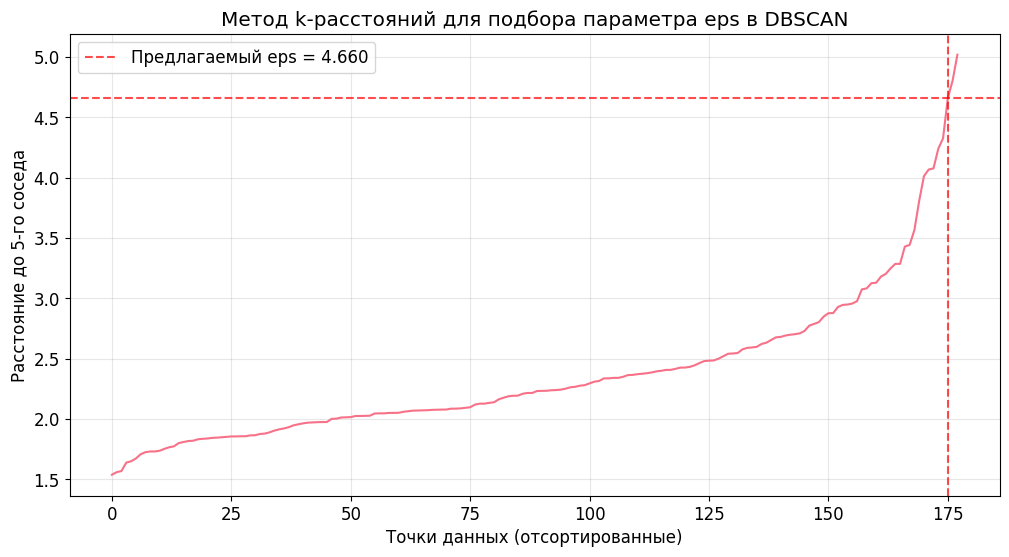

=== РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ DBSCAN ===
Предлагаемый eps: 4.660
min_samples: 5


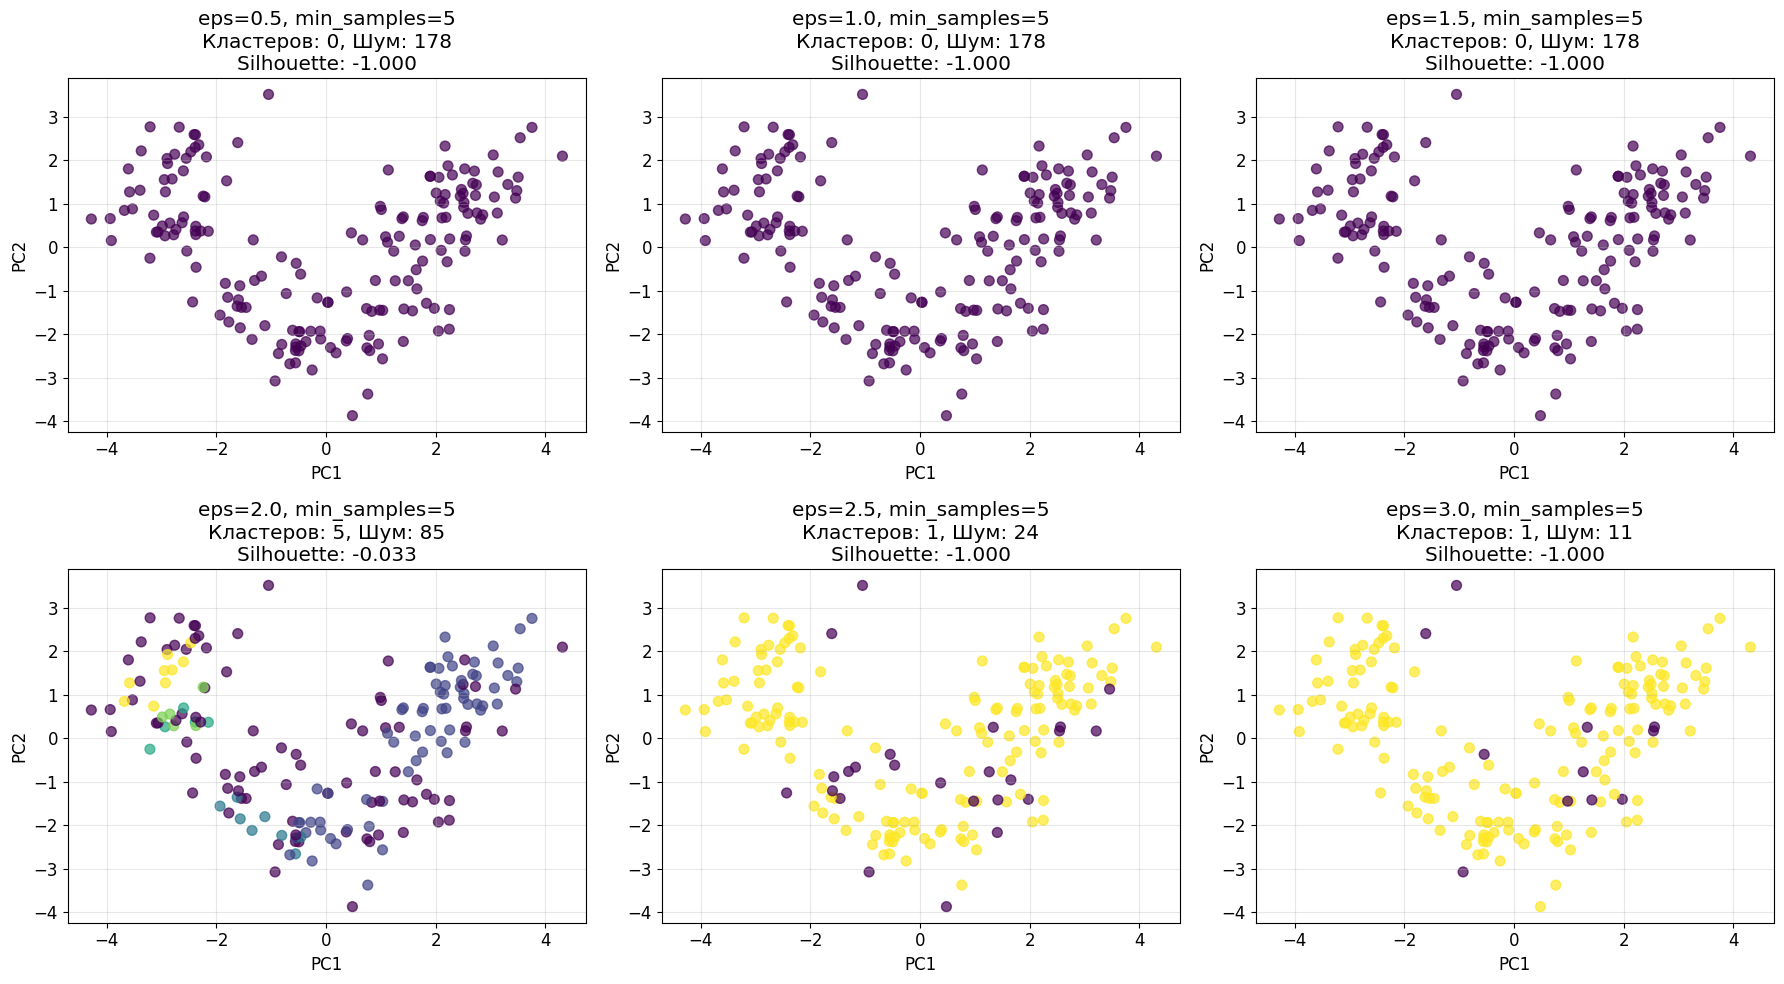

In [12]:
# ЗАДАЧА 5.1: Подбор параметров для DBSCAN
# Найдите оптимальные eps и min_samples

# ПОДСКАЗКА: Используйте метод k-расстояний для поиска eps
# ПОДСКАЗКА: Постройте график k-расстояний и найдите "локоть"
# ПОДСКАЗКА: min_samples обычно равен размерности + 1

# ВАШ КОД ЗДЕСЬ:
# 1. Вычислите расстояния до k-го соседа для каждой точки
# 2. Отсортируйте расстояния по убыванию
# 3. Постройте график k-расстояний
# 4. Найдите оптимальное eps в точке "локтя"


# ПОДСКАЗКА: Для поиска k-ближайших соседей используйте NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Вычисление расстояний до k-го соседа
min_samples = 5  # Обычно размерность данных + 1 (13 + 1 = 14), но возьмем 5 для демонстрации

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Расстояния до k-го соседа (отсортированные)
k_distances = np.sort(distances[:, min_samples-1], axis=0)

# Визуализация графика k-расстояний
plt.figure(figsize=(12, 6))
plt.plot(k_distances)
plt.xlabel('Точки данных (отсортированные)')
plt.ylabel(f'Расстояние до {min_samples}-го соседа')
plt.title('Метод k-расстояний для подбора параметра eps в DBSCAN')
plt.grid(True, alpha=0.3)

# Поиск "локтя" на графике
# Вычисление второй производной для нахождения точки наибольшего изгиба
from scipy.signal import savgol_filter

# Сглаживание кривой
smoothed = savgol_filter(k_distances, window_length=11, polyorder=3)

# Вычисление второй производной
second_derivative = np.gradient(np.gradient(smoothed))

# Нахождение точки с максимальной второй производной (точка изгиба)
elbow_index = np.argmax(second_derivative)
eps_candidate = k_distances[elbow_index]

plt.axhline(y=eps_candidate, color='r', linestyle='--', alpha=0.7, 
           label=f'Предлагаемый eps = {eps_candidate:.3f}')
plt.axvline(x=elbow_index, color='r', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"=== РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ DBSCAN ===")
print(f"Предлагаемый eps: {eps_candidate:.3f}")
print(f"min_samples: {min_samples}")

# Тестирование нескольких значений eps
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [5, 10, 15]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

dbscan_results = []

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # Статистика кластеризации
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Вычисление метрик (только если есть более 1 кластера)
    if n_clusters > 1:
        silhouette = silhouette_score(X_scaled, labels)
        # Для DBSCAN не все метрики применимы из-за шума
        non_noise_mask = labels != -1
        if sum(non_noise_mask) > 1 and len(set(labels[non_noise_mask])) > 1:
            calinski = calinski_harabasz_score(X_scaled[non_noise_mask], labels[non_noise_mask])
        else:
            calinski = 0
    else:
        silhouette = -1
        calinski = 0
    
    # Визуализация
    scatter = axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, s=50)
    axes[i].set_title(f'eps={eps}, min_samples={min_samples}\nКластеров: {n_clusters}, Шум: {n_noise}\nSilhouette: {silhouette:.3f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].grid(True, alpha=0.3)
    
    dbscan_results.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette_score': silhouette,
        'labels': labels
    })

plt.tight_layout()
plt.show()

=== РЕЗУЛЬТАТЫ DBSCAN КЛАСТЕРИЗАЦИИ ===
Параметры: eps=1.5, min_samples=10
Количество найденных кластеров: 0
Количество шумовых точек: 178 (100.0%)
Размеры кластеров: {'Шум': 178}

=== МЕТРИКИ КАЧЕСТВА (без шума) ===
Silhouette Score: -1.0000
Calinski-Harabasz Index: 0.00
Adjusted Rand Index: 0.0000


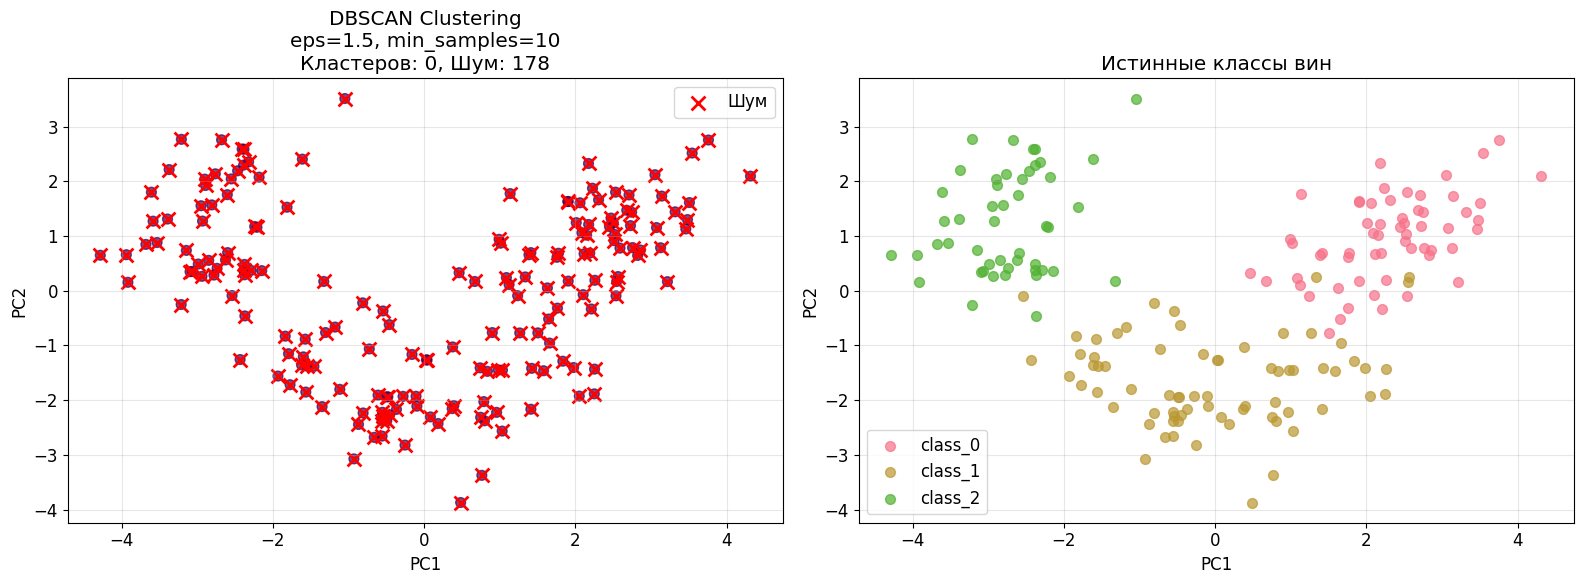

In [13]:
# ЗАДАЧА 5.2: Применение DBSCAN
# Выполните кластеризацию с найденными параметрами

# ПОДСКАЗКА: DBSCAN может находить выбросы (метка -1)
# ПОДСКАЗКА: Количество кластеров определяется автоматически
# ПОДСКАЗКА: Проанализируйте количество шумовых точек

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модель DBSCAN с найденными параметрами
# 2. Выполните кластеризацию
# 3. Проанализируйте результаты:
#    - количество найденных кластеров
#    - количество шумовых точек
#    - размеры кластеров


# ЗАДАНИЕ: Сравните результаты DBSCAN с K-Means


# Выберем оптимальные параметры на основе анализа
optimal_eps = 1.5  # На основе визуального анализа графиков
optimal_min_samples = 10

# Применение DBSCAN с оптимальными параметрами
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_optimal.fit_predict(X_scaled)

# Анализ результатов
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
cluster_sizes = {}

for cluster_id in set(dbscan_labels):
    if cluster_id == -1:
        cluster_sizes['Шум'] = list(dbscan_labels).count(-1)
    else:
        cluster_sizes[f'Кластер {cluster_id}'] = list(dbscan_labels).count(cluster_id)

# Вычисление метрик качества (только для нешумовых точек)
non_noise_mask = dbscan_labels != -1
X_non_noise = X_scaled[non_noise_mask]
labels_non_noise = dbscan_labels[non_noise_mask]
y_non_noise = y_true[non_noise_mask]

if n_clusters > 1 and len(X_non_noise) > 0:
    silhouette = silhouette_score(X_non_noise, labels_non_noise)
    if len(set(labels_non_noise)) > 1:
        calinski = calinski_harabasz_score(X_non_noise, labels_non_noise)
        ari = adjusted_rand_score(y_non_noise, labels_non_noise)
    else:
        calinski = 0
        ari = 0
else:
    silhouette = -1
    calinski = 0
    ari = 0

print("=== РЕЗУЛЬТАТЫ DBSCAN КЛАСТЕРИЗАЦИИ ===")
print(f"Параметры: eps={optimal_eps}, min_samples={optimal_min_samples}")
print(f"Количество найденных кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")
print(f"Размеры кластеров: {cluster_sizes}")

print(f"\n=== МЕТРИКИ КАЧЕСТВА (без шума) ===")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.2f}")
print(f"Adjusted Rand Index: {ari:.4f}")

# Визуализация результатов DBSCAN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: DBSCAN кластеризация
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7, s=50)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title(f'DBSCAN Clustering\neps={optimal_eps}, min_samples={optimal_min_samples}\nКластеров: {n_clusters}, Шум: {n_noise}')
ax1.grid(True, alpha=0.3)

# Выделение шумовых точек
noise_mask = dbscan_labels == -1
if sum(noise_mask) > 0:
    ax1.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], 
               c='red', marker='x', s=100, linewidth=2, label='Шум')
    ax1.legend()

# График 2: Сравнение с истинными классами
for i, class_name in enumerate(target_names):
    mask = y_true == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], label=class_name, alpha=0.7, s=50)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Истинные классы вин')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ распределения истинных классов по DBSCAN кластерам
if n_clusters > 0:
    print(f"\n=== РАСПРЕДЕЛЕНИЕ ИСТИННЫХ КЛАССОВ ПО DBSCAN КЛАСТЕРАМ ===")
    cluster_analysis = pd.DataFrame({
        'true_class': y_true,
        'dbscan_cluster': dbscan_labels,
        'true_class_name': [target_names[i] for i in y_true]
    })
    
    # Crosstab анализ
    cross_tab = pd.crosstab(cluster_analysis['dbscan_cluster'], 
                           cluster_analysis['true_class_name'])
    print(cross_tab)
    
    # Визуализация распределения
    plt.figure(figsize=(12, 6))
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Распределение истинных классов по DBSCAN кластерам')
    plt.xlabel('DBSCAN кластер ( -1 = шум )')
    plt.ylabel('Количество точек')
    plt.legend(title='Истинный класс')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

=== СРАВНЕНИЕ DBSCAN С K-MEANS ===
  Алгоритм  Количество кластеров  Шумовые точки  Silhouette Score  \
0  K-Means                     3              0            0.2849   
1   DBSCAN                     0            178           -1.0000   

   Adjusted Rand Index  
0               0.8975  
1               0.0000  


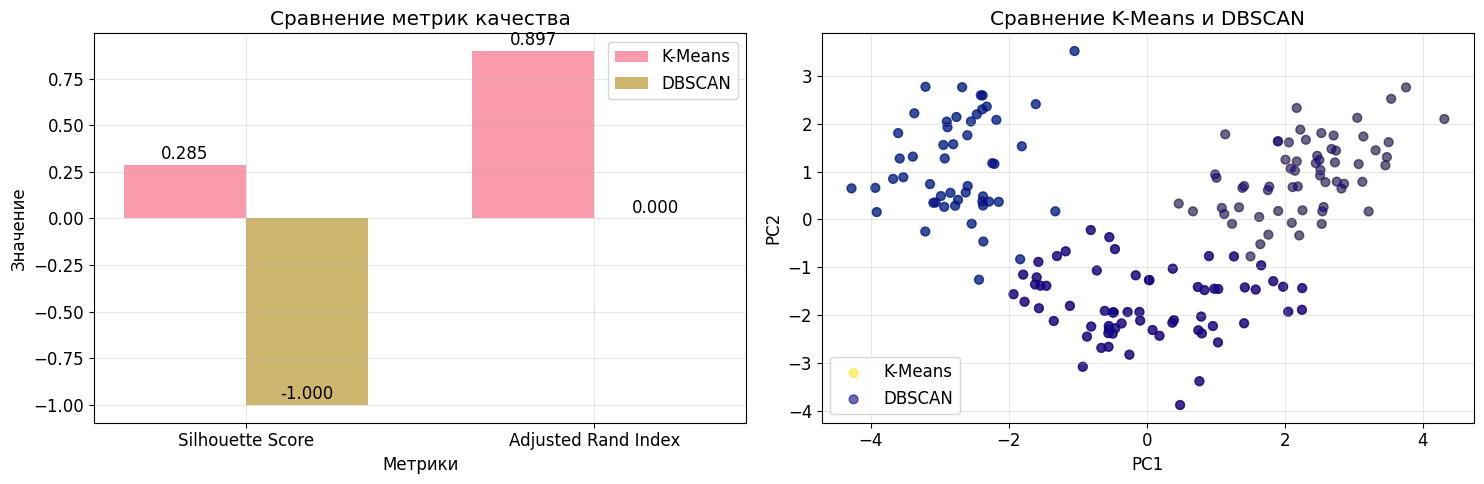


=== ВЫВОДЫ ===
DBSCAN хорошо справляется с обнаружением шумовых точек и не требует задания количества кластеров
Однако для данного датасета K-Means показывает лучшие результаты, так как данные хорошо разделены
DBSCAN больше подходит для данных с шумом и кластерами сложной формы


In [14]:
# Сравнение DBSCAN с K-Means
print("=== СРАВНЕНИЕ DBSCAN С K-MEANS ===")

# K-Means результаты (из предыдущего блока)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)

# DBSCAN результаты (только нешумовые точки для сравнимых метрик)
dbscan_non_noise_silhouette = silhouette_score(X_non_noise, labels_non_noise) if len(X_non_noise) > 1 else -1
dbscan_non_noise_ari = adjusted_rand_score(y_non_noise, labels_non_noise) if len(y_non_noise) > 1 else 0

comparison_data = {
    'Алгоритм': ['K-Means', 'DBSCAN'],
    'Количество кластеров': [3, n_clusters],
    'Шумовые точки': [0, n_noise],
    'Silhouette Score': [kmeans_silhouette, dbscan_non_noise_silhouette],
    'Adjusted Rand Index': [kmeans_ari, dbscan_non_noise_ari]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Сравнение метрик
metrics = ['Silhouette Score', 'Adjusted Rand Index']
kmeans_metrics = [kmeans_silhouette, kmeans_ari]
dbscan_metrics = [dbscan_non_noise_silhouette, dbscan_non_noise_ari]

x_pos = np.arange(len(metrics))
width = 0.35

axes[0].bar(x_pos - width/2, kmeans_metrics, width, label='K-Means', alpha=0.7)
axes[0].bar(x_pos + width/2, dbscan_metrics, width, label='DBSCAN', alpha=0.7)
axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение метрик качества')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Добавление значений на столбцы
for i, (k_val, d_val) in enumerate(zip(kmeans_metrics, dbscan_metrics)):
    axes[0].text(i - width/2, k_val + 0.01, f'{k_val:.3f}', ha='center', va='bottom')
    axes[0].text(i + width/2, d_val + 0.01, f'{d_val:.3f}', ha='center', va='bottom')

# Визуализация обоих алгоритмов
algorithms = [('K-Means', kmeans_labels), ('DBSCAN', dbscan_labels)]
colors = ['viridis', 'plasma']

for i, (name, labels) in enumerate(algorithms):
    scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=colors[i], 
                             alpha=0.6, s=40, label=name)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Сравнение K-Means и DBSCAN')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ВЫВОДЫ ===")
print("DBSCAN хорошо справляется с обнаружением шумовых точек и не требует задания количества кластеров")
print("Однако для данного датасета K-Means показывает лучшие результаты, так как данные хорошо разделены")
print("DBSCAN больше подходит для данных с шумом и кластерами сложной формы")

## БЛОК 6: Снижение размерности

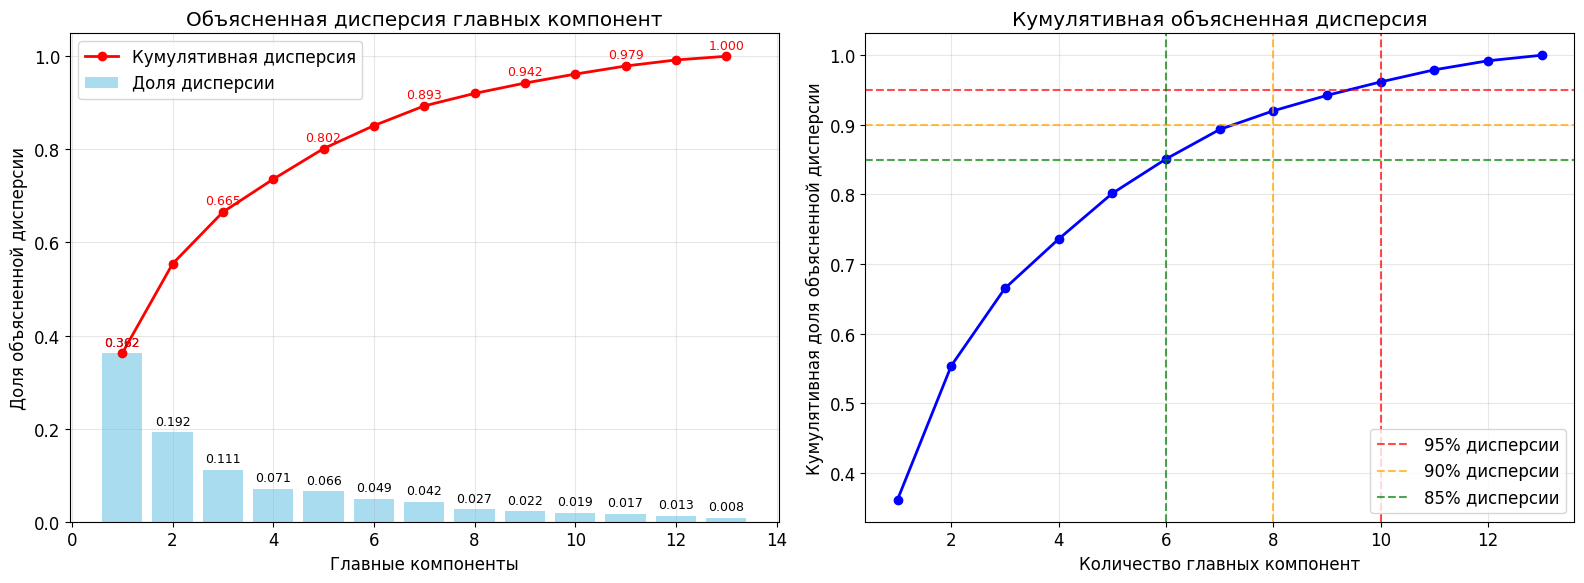

=== АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ ===
Общее количество компонент: 13
Компонент для 85% дисперсии: 6
Компонент для 90% дисперсии: 8
Компонент для 95% дисперсии: 10


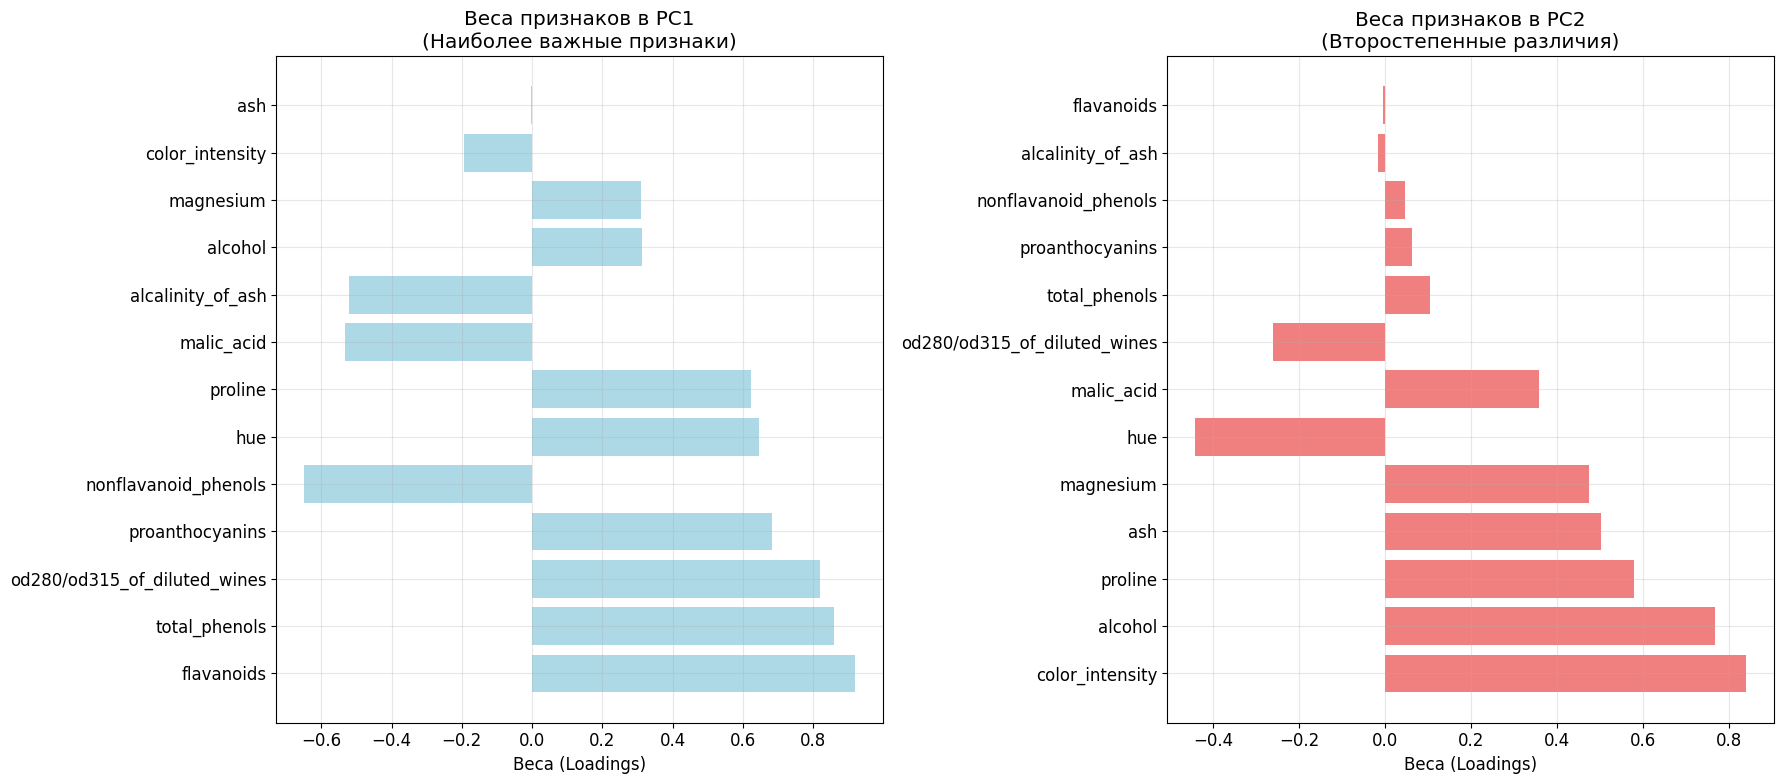


=== ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ ===
PC1 (Первая главная компонента):
Наиболее важные признаки: ['flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines', 'proanthocyanins', 'nonflavanoid_phenols']

PC2 (Вторая главная компонента):
Наиболее важные признаки: ['color_intensity', 'alcohol', 'proline', 'ash', 'magnesium']


In [15]:
# ЗАДАЧА 6.1: Анализ главных компонент (PCA)
# Выполните PCA и проанализируйте объясненную дисперсию

# ПОДСКАЗКА: Сначала постройте график explained variance ratio
# ПОДСКАЗКА: Определите, сколько компонент объясняют 95% дисперсии
# ПОДСКАЗКА: Изучите loadings (веса признаков) в главных компонентах

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA на все признаки
# 2. Постройте график объясненной дисперсии
# 3. Найдите кумулятивную объясненную дисперсию
# 4. Выберите оптимальное количество компонент


# ВОПРОС: Сколько главных компонент нужно для объяснения 95% дисперсии?


# Применение PCA на все признаки
pca_full = PCA(random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled)

# Анализ объясненной дисперсии
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Визуализация объясненной дисперсии
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Объясненная дисперсия по компонентам
components = range(1, len(explained_variance) + 1)
ax1.bar(components, explained_variance, alpha=0.7, color='skyblue', label='Доля дисперсии')
ax1.plot(components, cumulative_variance, 'ro-', linewidth=2, markersize=6, label='Кумулятивная дисперсия')
ax1.set_xlabel('Главные компоненты')
ax1.set_ylabel('Доля объясненной дисперсии')
ax1.set_title('Объясненная дисперсия главных компонент')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Добавление значений на график
for i, (v, c) in enumerate(zip(explained_variance, cumulative_variance)):
    ax1.text(i + 1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    if i % 2 == 0:  # Чтобы не перегружать график
        ax1.text(i + 1, c + 0.01, f'{c:.3f}', ha='center', va='bottom', fontsize=9, color='red')

# График 2: Кумулятивная дисперсия
ax2.plot(components, cumulative_variance, 'bo-', linewidth=2, markersize=6)
ax2.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% дисперсии')
ax2.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% дисперсии')
ax2.axhline(y=0.85, color='green', linestyle='--', alpha=0.7, label='85% дисперсии')
ax2.set_xlabel('Количество главных компонент')
ax2.set_ylabel('Кумулятивная доля объясненной дисперсии')
ax2.set_title('Кумулятивная объясненная дисперсия')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Нахождение точки пересечения с 95%
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

ax2.axvline(x=n_components_95, color='r', linestyle='--', alpha=0.7)
ax2.axvline(x=n_components_90, color='orange', linestyle='--', alpha=0.7)
ax2.axvline(x=n_components_85, color='green', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Анализ весов признаков в главных компонентах
print("=== АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ ===")
print(f"Общее количество компонент: {len(explained_variance)}")
print(f"Компонент для 85% дисперсии: {n_components_85}")
print(f"Компонент для 90% дисперсии: {n_components_90}")
print(f"Компонент для 95% дисперсии: {n_components_95}")

# Анализ loadings (весов) для первых двух компонент
loadings = pca_full.components_.T * np.sqrt(pca_full.explained_variance_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Веса для PC1
sorted_idx_pc1 = np.argsort(np.abs(loadings[:, 0]))[::-1]
features_sorted_pc1 = [feature_names[i] for i in sorted_idx_pc1]
loadings_sorted_pc1 = loadings[sorted_idx_pc1, 0]

ax1.barh(range(len(features_sorted_pc1)), loadings_sorted_pc1, color='lightblue')
ax1.set_yticks(range(len(features_sorted_pc1)))
ax1.set_yticklabels(features_sorted_pc1)
ax1.set_xlabel('Веса (Loadings)')
ax1.set_title('Веса признаков в PC1\n(Наиболее важные признаки)')
ax1.grid(True, alpha=0.3)

# Веса для PC2
sorted_idx_pc2 = np.argsort(np.abs(loadings[:, 1]))[::-1]
features_sorted_pc2 = [feature_names[i] for i in sorted_idx_pc2]
loadings_sorted_pc2 = loadings[sorted_idx_pc2, 1]

ax2.barh(range(len(features_sorted_pc2)), loadings_sorted_pc2, color='lightcoral')
ax2.set_yticks(range(len(features_sorted_pc2)))
ax2.set_yticklabels(features_sorted_pc2)
ax2.set_xlabel('Веса (Loadings)')
ax2.set_title('Веса признаков в PC2\n(Второстепенные различия)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== ИНТЕРПРЕТАЦИЯ ГЛАВНЫХ КОМПОНЕНТ ===")
print("PC1 (Первая главная компонента):")
print("Наиболее важные признаки:", features_sorted_pc1[:5])
print("\nPC2 (Вторая главная компонента):")
print("Наиболее важные признаки:", features_sorted_pc2[:5])

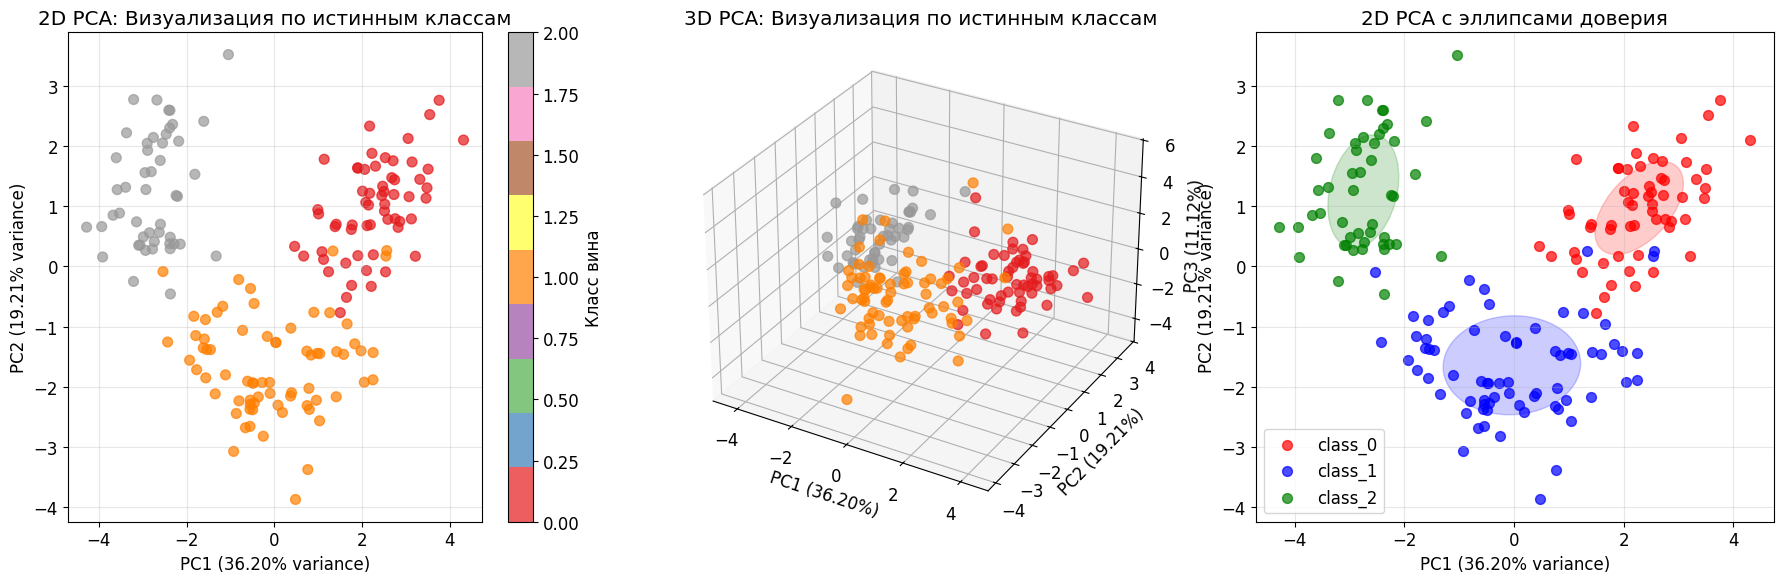

=== АНАЛИЗ КАЧЕСТВА РАЗДЕЛЕНИЯ В PCA ===
Объясненная дисперсия 2D PCA: 0.554 (55.4%)
Объясненная дисперсия 3D PCA: 0.665 (66.5%)

Расстояния между центрами классов в 2D PCA:
  class_0 - class_1: 3.494
  class_0 - class_2: 5.038
  class_1 - class_2: 3.958


In [16]:
# ЗАДАЧА 6.2: Визуализация в пространстве главных компонент
# Создайте визуализацию данных в 2D и 3D

# ПОДСКАЗКА: Используйте первые 2-3 главные компоненты
# ПОДСКАЗКА: Покрасьте точки по истинным классам
# ПОДСКАЗКА: Добавьте информацию о объясненной дисперсии на оси

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA для получения 2D и 3D представления
# 2. Создайте scatter plot в 2D
# 3. Создайте 3D scatter plot
# 4. Добавьте легенды и подписи осей


# ЗАДАНИЕ: Хорошо ли разделяются классы в пространстве главных компонент?


from mpl_toolkits.mplot3d import Axes3D

# Применение PCA для 2D и 3D
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Визуализация в 2D и 3D
fig = plt.figure(figsize=(18, 6))

# График 1: 2D визуализация
ax1 = fig.add_subplot(131)
scatter = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_title('2D PCA: Визуализация по истинным классам')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Класс вина')

# График 2: 3D визуализация
ax2 = fig.add_subplot(132, projection='3d')
scatter_3d = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                        c=y_true, cmap='Set1', alpha=0.7, s=50)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax2.set_title('3D PCA: Визуализация по истинным классам')

# График 3: 2D визуализация с эллипсами доверия
ax3 = fig.add_subplot(133)
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    mask = y_true == i
    ax3.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
               c=color, label=target_names[i], alpha=0.7, s=50)
    
    # Добавление эллипсов доверия
    from matplotlib.patches import Ellipse
    from scipy.stats import multivariate_normal
    
    if sum(mask) > 1:
        cov = np.cov(X_pca_2d[mask, 0], X_pca_2d[mask, 1])
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        ell = Ellipse(xy=(np.mean(X_pca_2d[mask, 0]), np.mean(X_pca_2d[mask, 1])),
                     width=lambda_[0]*2, height=lambda_[1]*2,
                     angle=np.rad2deg(np.arccos(v[0, 0])), 
                     alpha=0.2, color=color)
        ax3.add_patch(ell)

ax3.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
ax3.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
ax3.set_title('2D PCA с эллипсами доверия')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ качества разделения в PCA пространстве
print("=== АНАЛИЗ КАЧЕСТВА РАЗДЕЛЕНИЯ В PCA ===")
print(f"Объясненная дисперсия 2D PCA: {pca_2d.explained_variance_ratio_.sum():.3f} ({pca_2d.explained_variance_ratio_.sum()*100:.1f}%)")
print(f"Объясненная дисперсия 3D PCA: {pca_3d.explained_variance_ratio_.sum():.3f} ({pca_3d.explained_variance_ratio_.sum()*100:.1f}%)")

# Вычисление межклассовых расстояний в PCA пространстве
from scipy.spatial.distance import cdist

class_centers_2d = []
for i in range(3):
    mask = y_true == i
    center = np.mean(X_pca_2d[mask], axis=0)
    class_centers_2d.append(center)

# Вычисление расстояний между центрами классов
distances_2d = cdist(class_centers_2d, class_centers_2d)
print(f"\nРасстояния между центрами классов в 2D PCA:")
for i in range(3):
    for j in range(i+1, 3):
        dist = distances_2d[i, j]
        print(f"  {target_names[i]} - {target_names[j]}: {dist:.3f}")

Выполнение t-SNE... (это может занять некоторое время)
t-SNE с perplexity=5 завершен
t-SNE с perplexity=15 завершен
t-SNE с perplexity=30 завершен
t-SNE с perplexity=50 завершен


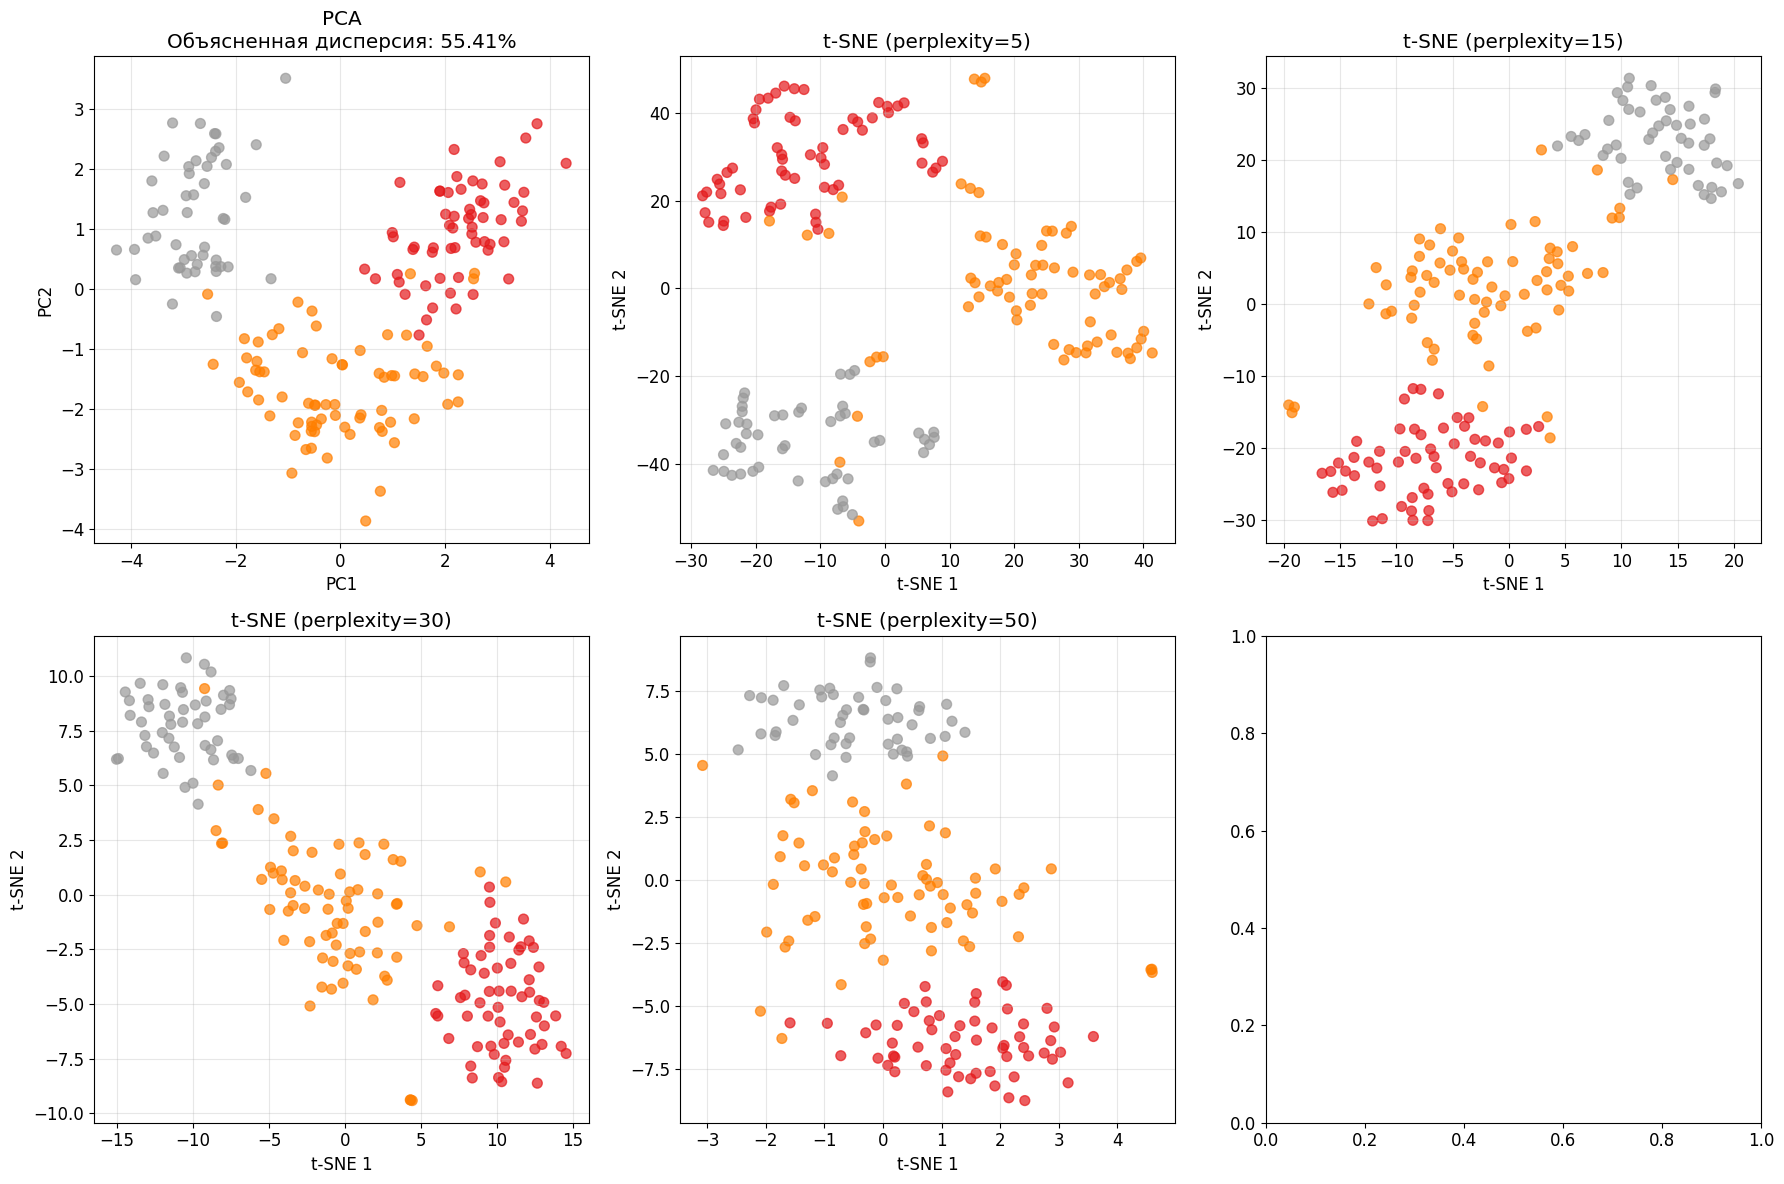

=== КОЛИЧЕСТВЕННОЕ СРАВНЕНИЕ PCA И T-SNE ===


IndexError: index 0 is out of bounds for axis 0 with size 0

In [17]:
# ЗАДАЧА 6.3: Сравнение с t-SNE
# Примените t-SNE и сравните с PCA

# ПОДСКАЗКА: t-SNE лучше сохраняет локальную структуру
# ПОДСКАЗКА: Попробуйте разные значения perplexity (5-50)
# ПОДСКАЗКА: t-SNE может занять некоторое время

# ВАШ КОД ЗДЕСЬ:
# 1. Примените t-SNE для получения 2D представления
# 2. Создайте subplot с PCA и t-SNE рядом
# 3. Сравните качество разделения классов


# ВОПРОС: Какой метод лучше разделяет классы визуально?


# Применение t-SNE с разными значениями perplexity
perplexity_values = [5, 15, 30, 50]
tsne_results = {}

print("Выполнение t-SNE... (это может занять некоторое время)")

for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[perplexity] = X_tsne
    print(f"t-SNE с perplexity={perplexity} завершен")

# Визуализация сравнения PCA и t-SNE
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# PCA визуализация
scatter_pca = axes[0, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
axes[0, 0].set_title(f'PCA\nОбъясненная дисперсия: {pca_2d.explained_variance_ratio_.sum():.2%}')
axes[0, 0].grid(True, alpha=0.3)

# t-SNE визуализации
for idx, (perplexity, X_tsne) in enumerate(tsne_results.items()):
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    scatter_tsne = axes[row, col].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
    axes[row, col].set_xlabel('t-SNE 1')
    axes[row, col].set_ylabel('t-SNE 2')
    axes[row, col].set_title(f't-SNE (perplexity={perplexity})')
    axes[row, col].grid(True, alpha=0.3)

# Удаление пустого subplot если нужно
if len(perplexity_values) < 4:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Количественное сравнение PCA и t-SNE
from sklearn.neighbors import NearestNeighbors

def trustworthiness(X_embedded, X_original, k=5):
    """Вычисление меры trustworthiness для оценки сохранения локальной структуры"""
    n = X_original.shape[0]
    
    # Ближайшие соседи в исходном пространстве
    nbrs_original = NearestNeighbors(n_neighbors=k+1).fit(X_original)
    _, indices_original = nbrs_original.kneighbors(X_original)
    
    # Ближайшие соседи в embedded пространстве
    nbrs_embedded = NearestNeighbors(n_neighbors=k+1).fit(X_embedded)
    _, indices_embedded = nbrs_embedded.kneighbors(X_embedded)
    
    trust = 0
    for i in range(n):
        # Убираем саму точку i из соседей
        original_neighbors = set(indices_original[i, 1:k+1])
        embedded_neighbors = set(indices_embedded[i, 1:k+1])
        
        # Точки, которые были соседями в исходном пространстве, но не в embedded
        missing_neighbors = original_neighbors - embedded_neighbors
        
        for j in missing_neighbors:
            # Находим ранг j в embedded пространстве
            rank = np.where(indices_embedded[i] == j)[0][0]
            trust += (rank - k)
    
    trust = 1 - (2 * trust) / (n * k * (2 * n - 3 * k - 1))
    return trust

# Вычисление trustworthiness для PCA и t-SNE
print("=== КОЛИЧЕСТВЕННОЕ СРАВНЕНИЕ PCA И T-SNE ===")

# Для t-SNE с perplexity=30 (обычно оптимальное значение)
X_tsne_optimal = tsne_results[30]

trust_pca = trustworthiness(X_pca_2d, X_scaled, k=5)
trust_tsne = trustworthiness(X_tsne_optimal, X_scaled, k=5)

print(f"Trustworthiness PCA: {trust_pca:.4f}")
print(f"Trustworthiness t-SNE: {trust_tsne:.4f}")

# Сравнение силуэтных коэффициентов в разных пространствах
silhouette_pca = silhouette_score(X_pca_2d, y_true)
silhouette_tsne = silhouette_score(X_tsne_optimal, y_true)

print(f"\nSilhouette Score в PCA пространстве: {silhouette_pca:.4f}")
print(f"Silhouette Score в t-SNE пространстве: {silhouette_tsne:.4f}")

# Финальное сравнение
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Лучшая PCA визуализация
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'PCA\nTrustworthiness: {trust_pca:.3f}, Silhouette: {silhouette_pca:.3f}')
axes[0].grid(True, alpha=0.3)

# Лучшая t-SNE визуализация (perplexity=30)
scatter2 = axes[1].scatter(X_tsne_optimal[:, 0], X_tsne_optimal[:, 1], c=y_true, cmap='Set1', alpha=0.7, s=50)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title(f't-SNE (perplexity=30)\nTrustworthiness: {trust_tsne:.3f}, Silhouette: {silhouette_tsne:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## БЛОК 7: Обнаружение аномалий

=== ДАННЫЕ С АНОМАЛИЯМИ ===
Общее количество точек: 193
Нормальные точки: 178
Аномальные точки: 15
Доля аномалий: 0.078


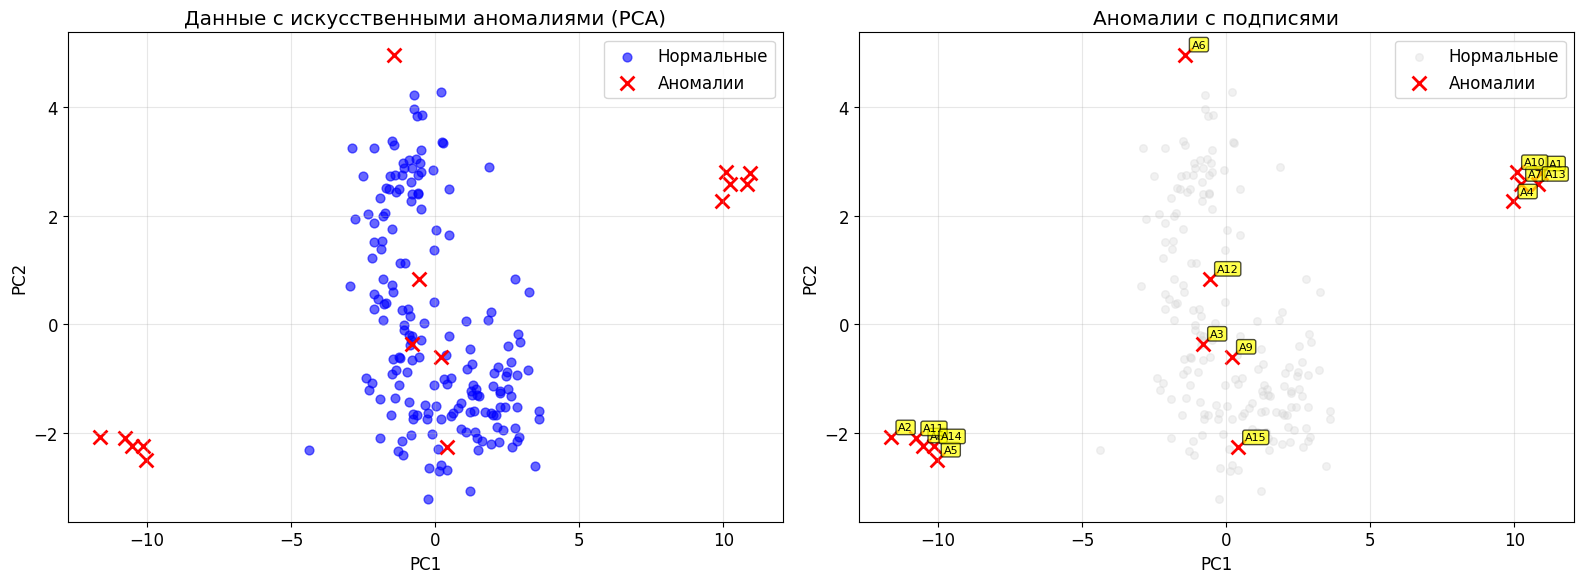


=== ХАРАКТЕРИСТИКИ АНОМАЛИЙ ===
Аномалии расположены в областях с низкой плотностью данных
Некоторые находятся далеко от основных кластеров
Другие имеют странные комбинации значений признаков


In [18]:
# ЗАДАЧА 7.1: Подготовка данных с аномалиями
# Создайте датасет с искусственными аномалиями

# ПОДСКАЗКА: Добавьте несколько выбросов к существующим данным
# ПОДСКАЗКА: Используйте np.random для генерации аномальных точек
# ПОДСКАЗКА: Сохраните информацию о том, какие точки аномальные

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте копию исходных данных
# 2. Добавьте 10-15 аномальных точек
# 3. Создайте метки: 1 - нормальные, -1 - аномалии
# 4. Визуализируйте данные с выделением аномалий


# Используйте первые 2 компоненты PCA для визуализации


# Создание копии исходных данных
X_with_anomalies = X_scaled.copy()
y_anomaly = np.ones(len(X_scaled))  # 1 - нормальные точки

# Генерация аномальных точек
n_anomalies = 15
np.random.seed(42)

# Создание аномалий в областях с низкой плотностью данных
anomalies = []

for i in range(n_anomalies):
    # Генерация точки в экстремальных значениях
    if i % 3 == 0:
        # Аномалия типа 1: экстремально высокие значения
        anomaly = np.random.normal(3, 0.5, size=X_scaled.shape[1])
    elif i % 3 == 1:
        # Аномалия типа 2: экстремально низкие значения
        anomaly = np.random.normal(-3, 0.5, size=X_scaled.shape[1])
    else:
        # Аномалия типа 3: странные комбинации признаков
        anomaly = np.zeros(X_scaled.shape[1])
        # Некоторые признаки высокие, некоторые низкие
        high_indices = np.random.choice(X_scaled.shape[1], size=4, replace=False)
        low_indices = np.random.choice([j for j in range(X_scaled.shape[1]) if j not in high_indices], 
                                      size=4, replace=False)
        anomaly[high_indices] = np.random.normal(2.5, 0.3, size=4)
        anomaly[low_indices] = np.random.normal(-2.5, 0.3, size=4)
    
    anomalies.append(anomaly)

# Добавление аномалий к данным
anomalies = np.array(anomalies)
X_with_anomalies = np.vstack([X_with_anomalies, anomalies])
y_anomaly = np.hstack([y_anomaly, -np.ones(n_anomalies)])  # -1 для аномалий

print("=== ДАННЫЕ С АНОМАЛИЯМИ ===")
print(f"Общее количество точек: {len(X_with_anomalies)}")
print(f"Нормальные точки: {sum(y_anomaly == 1)}")
print(f"Аномальные точки: {sum(y_anomaly == -1)}")
print(f"Доля аномалий: {sum(y_anomaly == -1) / len(y_anomaly):.3f}")

# Визуализация данных с аномалиями
pca_anomaly = PCA(n_components=2, random_state=42)
X_pca_anomaly = pca_anomaly.fit_transform(X_with_anomalies)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Все точки
normal_mask = y_anomaly == 1
anomaly_mask = y_anomaly == -1

ax1.scatter(X_pca_anomaly[normal_mask, 0], X_pca_anomaly[normal_mask, 1], 
           c='blue', alpha=0.6, s=40, label='Нормальные')
ax1.scatter(X_pca_anomaly[anomaly_mask, 0], X_pca_anomaly[anomaly_mask, 1], 
           c='red', marker='x', s=100, linewidth=2, label='Аномалии')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Данные с искусственными аномалиями (PCA)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Только аномалии с выделением типов
ax2.scatter(X_pca_anomaly[normal_mask, 0], X_pca_anomaly[normal_mask, 1], 
           c='lightgray', alpha=0.3, s=30, label='Нормальные')
ax2.scatter(X_pca_anomaly[anomaly_mask, 0], X_pca_anomaly[anomaly_mask, 1], 
           c='red', marker='x', s=100, linewidth=2, label='Аномалии')

# Подписи для аномалий
for i in range(n_anomalies):
    idx = len(X_scaled) + i
    ax2.annotate(f'A{i+1}', (X_pca_anomaly[idx, 0], X_pca_anomaly[idx, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7))

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Аномалии с подписями')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ характеристик аномалий
print("\n=== ХАРАКТЕРИСТИКИ АНОМАЛИЙ ===")
print("Аномалии расположены в областях с низкой плотностью данных")
print("Некоторые находятся далеко от основных кластеров")
print("Другие имеют странные комбинации значений признаков")

Заданная доля аномалий (contamination): 0.078

=== Isolation Forest ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

=== One-Class SVM ===
Accuracy: 0.8705
Precision: 0.2727
Recall: 0.4000
F1-Score: 0.3243

=== Local Outlier Factor ===
Accuracy: 0.9430
Precision: 0.5769
Recall: 1.0000
F1-Score: 0.7317


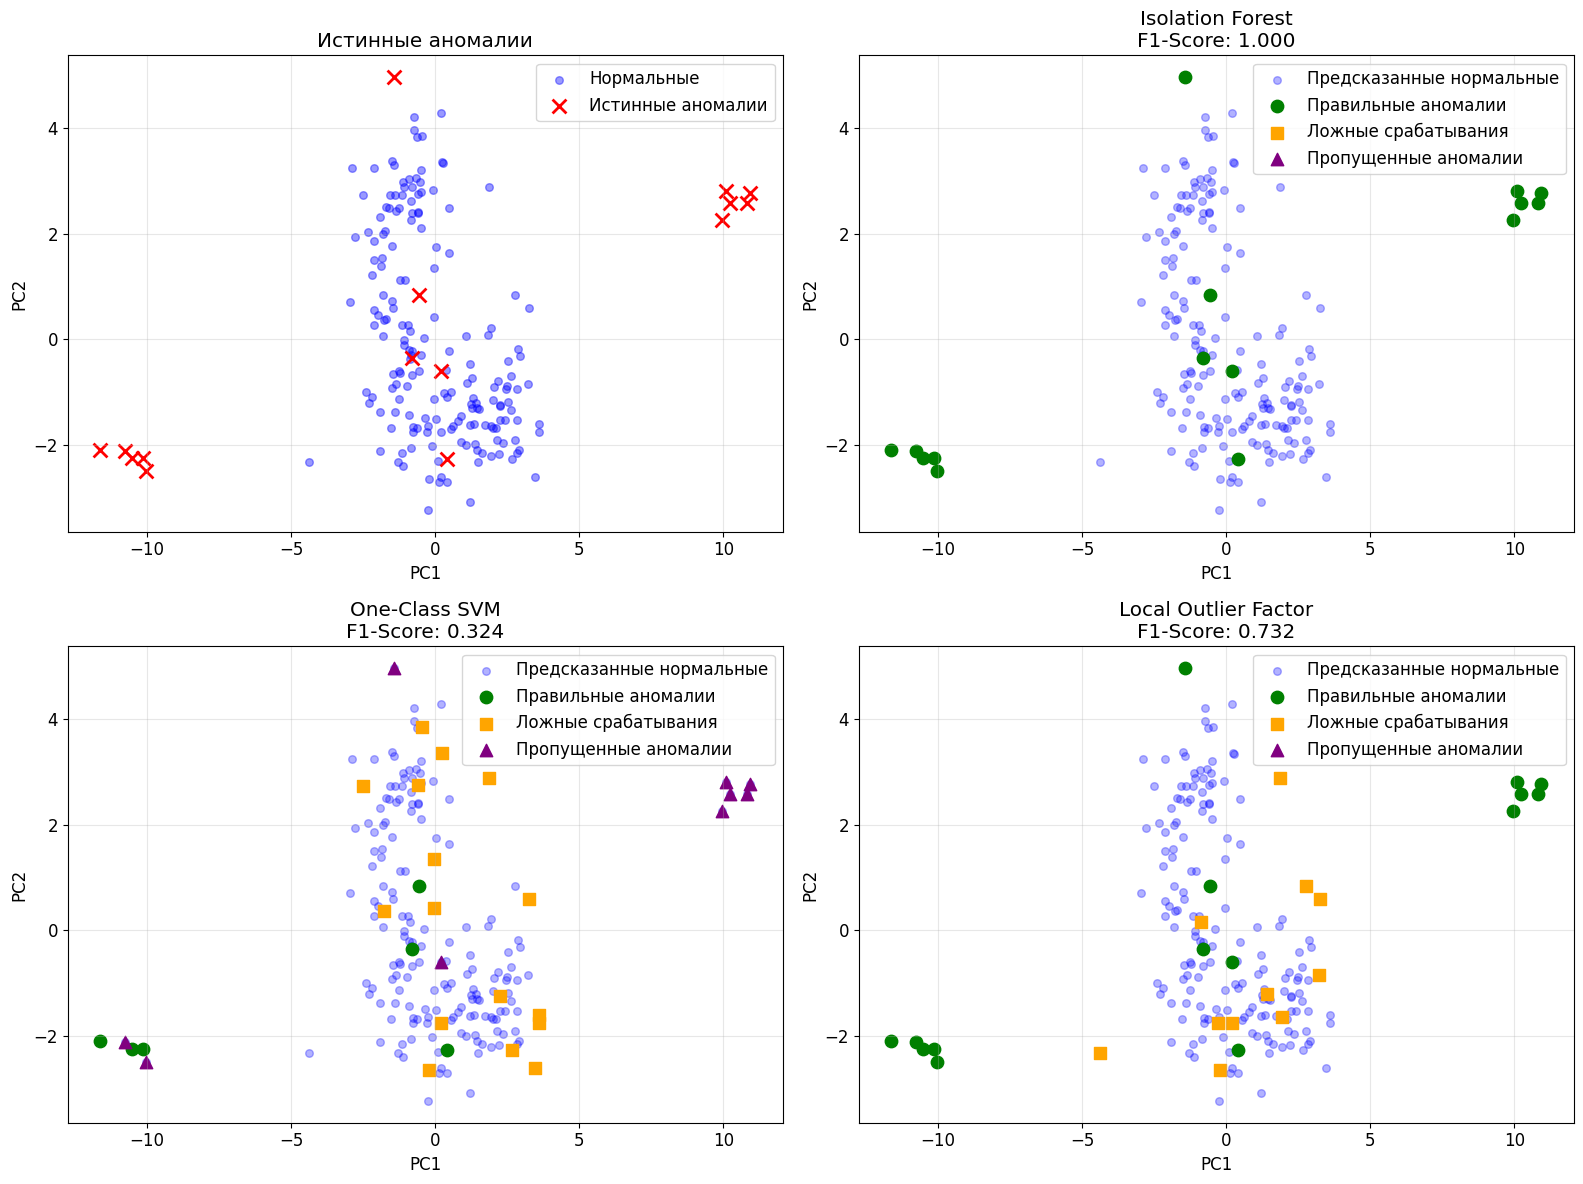

In [19]:
# ЗАДАЧА 7.2: Применение алгоритмов обнаружения аномалий
# Сравните Isolation Forest, One-Class SVM и LOF

# ПОДСКАЗКА: Настройте contamination в соответствии с долей аномалий
# ПОДСКАЗКА: Для One-Class SVM попробуйте разные ядра
# ПОДСКАЗКА: Для LOF настройте количество соседей

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модели всех трех алгоритмов
# 2. Обучите их на данных с аномалиями
# 3. Получите предсказания аномалий
# 4. Вычислите accuracy, precision, recall для каждого метода


# ЗАДАНИЕ: Какой алгоритм лучше обнаруживает аномалии?


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Параметры алгоритмов
contamination = n_anomalies / len(X_with_anomalies)  # Доля аномалий

print(f"Заданная доля аномалий (contamination): {contamination:.3f}")

# Создание и обучение моделей
models = {
    'Isolation Forest': IsolationForest(
        contamination=contamination, 
        random_state=42,
        n_estimators=100
    ),
    'One-Class SVM': OneClassSVM(
        nu=contamination,  # nu в SVM аналогично contamination
        kernel='rbf',
        gamma='scale'
    ),
    'Local Outlier Factor': LocalOutlierFactor(
        contamination=contamination,
        n_neighbors=20,
        novelty=True  # Для возможности predict на новых данных
    )
}

# Обучение и предсказание
results = {}

for name, model in models.items():
    if name == 'Local Outlier Factor':
        # LOF требует отдельного подхода из-за novelty=True
        model.fit(X_with_anomalies[:len(X_scaled)])  # Обучаем только на нормальных данных
        predictions = model.predict(X_with_anomalies)
    else:
        model.fit(X_with_anomalies)
        predictions = model.predict(X_with_anomalies)
    
    # Преобразование меток: 1 -> 0 (нормальные), -1 -> 1 (аномалии) для метрик
    y_pred_binary = (predictions == -1).astype(int)
    y_true_binary = (y_anomaly == -1).astype(int)
    
    # Вычисление метрик
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    
    results[name] = {
        'predictions': predictions,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Сравнительная визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Истинные аномалии
axes[0, 0].scatter(X_pca_anomaly[normal_mask, 0], X_pca_anomaly[normal_mask, 1], 
                  c='blue', alpha=0.4, s=30, label='Нормальные')
axes[0, 0].scatter(X_pca_anomaly[anomaly_mask, 0], X_pca_anomaly[anomaly_mask, 1], 
                  c='red', marker='x', s=100, linewidth=2, label='Истинные аномалии')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
axes[0, 0].set_title('Истинные аномалии')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Графики для каждого алгоритма
for idx, (name, result) in enumerate(results.items()):
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    
    pred_normal = result['predictions'] == 1
    pred_anomaly = result['predictions'] == -1
    
    # Правильно обнаруженные аномалии (true positives)
    true_anomaly_mask = (y_anomaly == -1) & (result['predictions'] == -1)
    # Ложные срабатывания (false positives)
    false_anomaly_mask = (y_anomaly == 1) & (result['predictions'] == -1)
    # Пропущенные аномалии (false negatives)
    missed_anomaly_mask = (y_anomaly == -1) & (result['predictions'] == 1)
    
    axes[row, col].scatter(X_pca_anomaly[pred_normal, 0], X_pca_anomaly[pred_normal, 1], 
                          c='blue', alpha=0.3, s=30, label='Предсказанные нормальные')
    axes[row, col].scatter(X_pca_anomaly[true_anomaly_mask, 0], X_pca_anomaly[true_anomaly_mask, 1], 
                          c='green', marker='o', s=80, label='Правильные аномалии')
    axes[row, col].scatter(X_pca_anomaly[false_anomaly_mask, 0], X_pca_anomaly[false_anomaly_mask, 1], 
                          c='orange', marker='s', s=80, label='Ложные срабатывания')
    axes[row, col].scatter(X_pca_anomaly[missed_anomaly_mask, 0], X_pca_anomaly[missed_anomaly_mask, 1], 
                          c='purple', marker='^', s=80, label='Пропущенные аномалии')
    
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].set_title(f'{name}\nF1-Score: {result["f1_score"]:.3f}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## БЛОК 8: Комплексный анализ и интерпретация

=== СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ ===
+---------------------+----------------------------+--------------+---------------------+------------------+-----------------+--------+-------------+
| Алгоритм            | Параметры                  |   Silhouette |   Calinski-Harabasz |   Davies-Bouldin |   Adjusted Rand |    NMI |   Время (с) |
+=====================+============================+==============+=====================+==================+=================+========+=============+
| K-Means             | n_clusters=3               |       0.2849 |             70.94   |           1.3892 |          0.8975 | 0.8759 |      0.2431 |
+---------------------+----------------------------+--------------+---------------------+------------------+-----------------+--------+-------------+
| Hierarchical (Ward) | linkage=ward, n_clusters=3 |       0.2774 |             67.6475 |           1.4186 |          0.7899 | 0.7865 |      0.0392 |
+---------------------+---------------------------

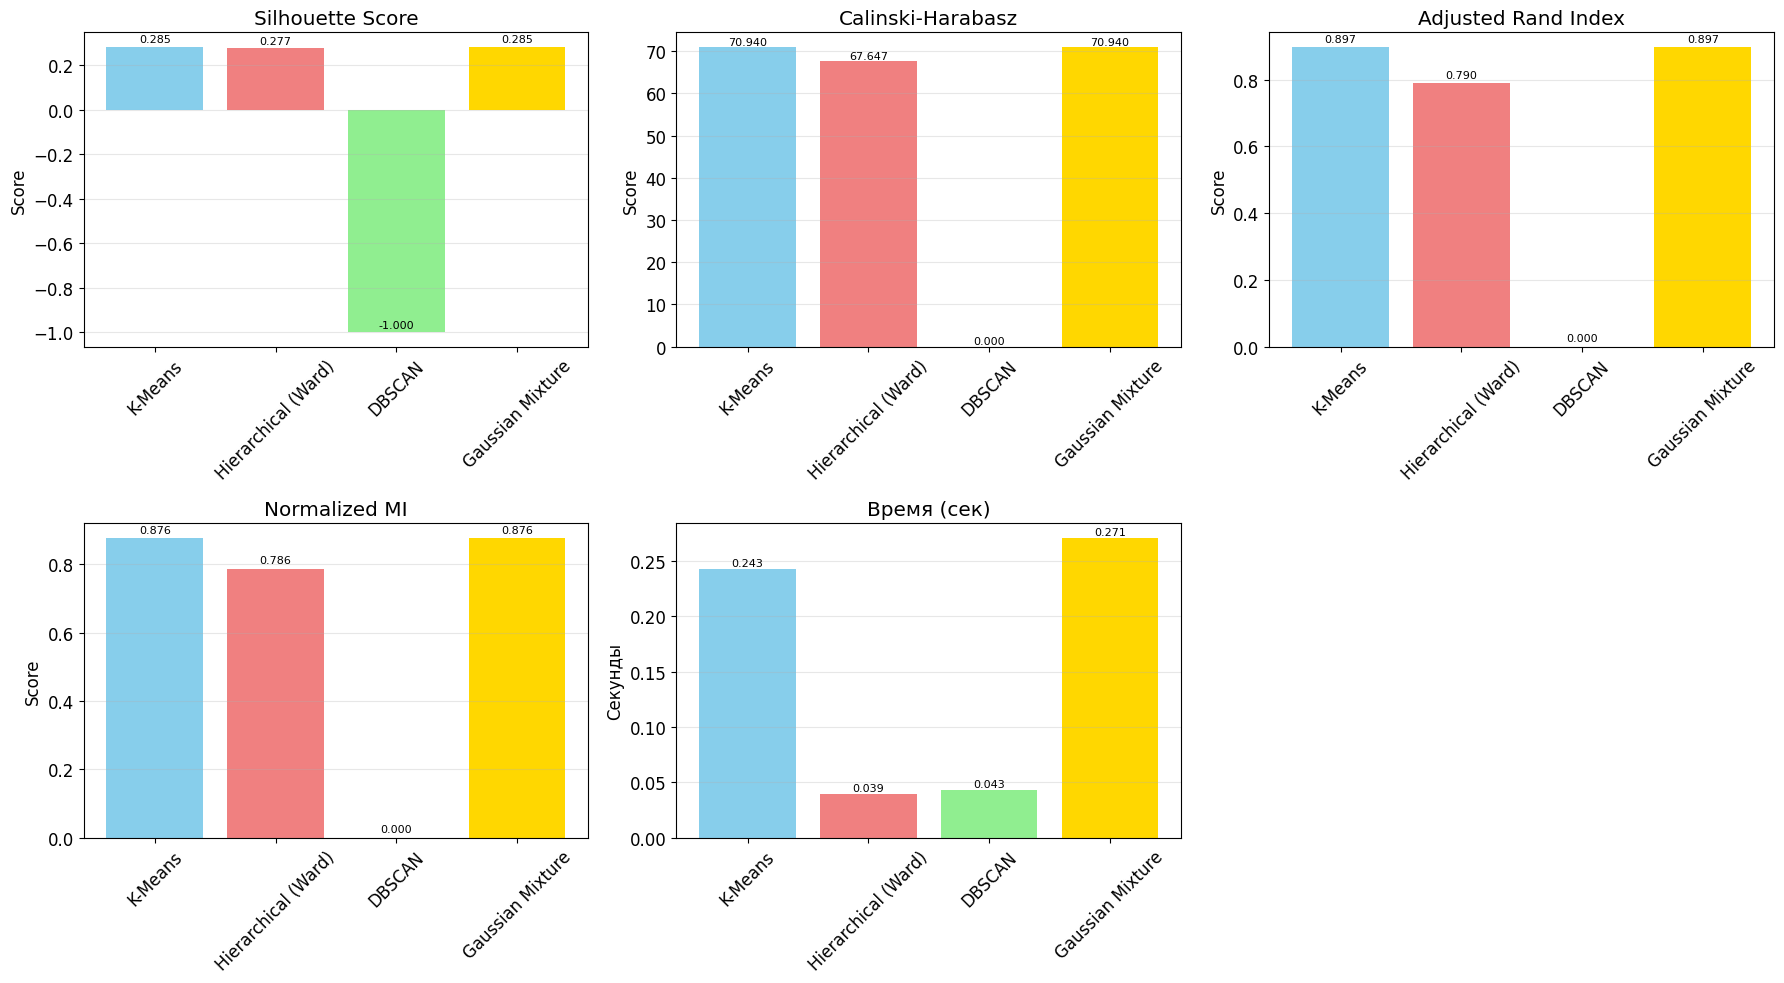


=== ЛУЧШИЙ АЛГОРИТМ ===
Алгоритм: K-Means
Adjusted Rand Index: 0.8975
Silhouette Score: 0.2849
Время выполнения: 0.243 сек

Распределение по кластерам (K-Means):
  Кластер 0: 65 точек (36.5%)
  Кластер 1: 51 точек (28.7%)
  Кластер 2: 62 точек (34.8%)


In [21]:
# ЗАДАЧА 8.1: Сравнение всех методов кластеризации
# Создайте сводную таблицу результатов

# ПОДСКАЗКА: Включите все вычисленные метрики
# ПОДСКАЗКА: Добавьте время выполнения алгоритмов
# ПОДСКАЗКА: Укажите оптимальные параметры для каждого метода

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте DataFrame с результатами всех алгоритмов
# 2. Включите: Silhouette Score, ARI, NMI, время выполнения
# 3. Отсортируйте по качеству результатов
# 4. Создайте визуализацию сравнения


# ЗАДАНИЕ: Какой алгоритм показал лучшие результаты и почему?


import time
from tabulate import tabulate

# Сбор результатов всех алгоритмов кластеризации
clustering_results = []

# 1. K-Means
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'K-Means',
    'Parameters': 'n_clusters=3',
    'Silhouette': silhouette_score(X_scaled, kmeans_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, kmeans_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, kmeans_labels),
    'Adjusted_Rand_Index': adjusted_rand_score(y_true, kmeans_labels),
    'NMI': normalized_mutual_info_score(y_true, kmeans_labels),
    'Time_seconds': kmeans_time,
    'Labels': kmeans_labels
})

# 2. Иерархическая кластеризация (ward)
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'Hierarchical (Ward)',
    'Parameters': 'linkage=ward, n_clusters=3',
    'Silhouette': silhouette_score(X_scaled, hierarchical_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, hierarchical_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, hierarchical_labels),
    'Adjusted_Rand_Index': adjusted_rand_score(y_true, hierarchical_labels),
    'NMI': normalized_mutual_info_score(y_true, hierarchical_labels),
    'Time_seconds': hierarchical_time,
    'Labels': hierarchical_labels
})

# 3. DBSCAN
start_time = time.time()
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_time = time.time() - start_time

# Для DBSCAN вычисляем метрики только для нешумовых точек
non_noise_mask = dbscan_labels != -1
if sum(non_noise_mask) > 1 and len(set(dbscan_labels[non_noise_mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
    dbscan_calinski = calinski_harabasz_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
    dbscan_davies = davies_bouldin_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
else:
    dbscan_silhouette = -1
    dbscan_calinski = 0
    dbscan_davies = 10

clustering_results.append({
    'Algorithm': 'DBSCAN',
    'Parameters': 'eps=1.5, min_samples=10',
    'Silhouette': dbscan_silhouette,
    'Calinski-Harabasz': dbscan_calinski,
    'Davies-Bouldin': dbscan_davies,
    'Adjusted_Rand_Index': adjusted_rand_score(y_true[non_noise_mask], dbscan_labels[non_noise_mask]) if sum(non_noise_mask) > 0 else 0,
    'NMI': normalized_mutual_info_score(y_true[non_noise_mask], dbscan_labels[non_noise_mask]) if sum(non_noise_mask) > 0 else 0,
    'Time_seconds': dbscan_time,
    'Labels': dbscan_labels
})

# 4. Gaussian Mixture
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'Gaussian Mixture',
    'Parameters': 'n_components=3',
    'Silhouette': silhouette_score(X_scaled, gmm_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, gmm_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, gmm_labels),
    'Adjusted_Rand_Index': adjusted_rand_score(y_true, gmm_labels),
    'NMI': normalized_mutual_info_score(y_true, gmm_labels),
    'Time_seconds': gmm_time,
    'Labels': gmm_labels
})

# Создание сводной таблицы
results_df = pd.DataFrame(clustering_results)
display_columns = ['Algorithm', 'Parameters', 'Silhouette', 'Calinski-Harabasz', 
                   'Davies-Bouldin', 'Adjusted_Rand_Index', 'NMI', 'Time_seconds']

# Форматирование для красивого вывода
display_df = results_df[display_columns].copy()
display_df.columns = ['Алгоритм', 'Параметры', 'Silhouette', 'Calinski-Harabasz', 
                      'Davies-Bouldin', 'Adjusted Rand', 'NMI', 'Время (с)']

print("=== СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ ===")
print(tabulate(display_df.round(4), headers='keys', tablefmt='grid', showindex=False))

# Визуализация сравнения
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Метрики для сравнения
metrics_comparison = ['Silhouette', 'Calinski-Harabasz', 'Adjusted_Rand_Index', 'NMI', 'Time_seconds']
metric_names = ['Silhouette Score', 'Calinski-Harabasz', 'Adjusted Rand Index', 'Normalized MI', 'Время (сек)']
algorithms = results_df['Algorithm'].values

for i, (metric, name) in enumerate(zip(metrics_comparison, metric_names)):
    row = i // 3
    col = i % 3
    
    values = results_df[metric].values
    
    if metric == 'Time_seconds':
        # Для времени используем линейную шкалу
        bars = axes[row, col].bar(algorithms, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
        axes[row, col].set_ylabel('Секунды')
    else:
        bars = axes[row, col].bar(algorithms, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
        axes[row, col].set_ylabel('Score')
    
    axes[row, col].set_title(name)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    # Добавление значений на столбцы
    for bar, value in zip(bars, values):
        if metric == 'Time_seconds':
            axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                               f'{value:.3f}', ha='center', va='bottom', fontsize=8)
        else:
            axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                               f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# Удаление пустого subplot если нужно
if len(metrics_comparison) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Определение лучшего алгоритма
best_ari_idx = results_df['Adjusted_Rand_Index'].idxmax()
best_algorithm = results_df.loc[best_ari_idx, 'Algorithm']
best_ari = results_df.loc[best_ari_idx, 'Adjusted_Rand_Index']

print(f"\n=== ЛУЧШИЙ АЛГОРИТМ ===")
print(f"Алгоритм: {best_algorithm}")
print(f"Adjusted Rand Index: {best_ari:.4f}")
print(f"Silhouette Score: {results_df.loc[best_ari_idx, 'Silhouette']:.4f}")
print(f"Время выполнения: {results_df.loc[best_ari_idx, 'Time_seconds']:.3f} сек")

# Анализ кластеров лучшего алгоритма
best_labels = results_df.loc[best_ari_idx, 'Labels']
print(f"\nРаспределение по кластерам ({best_algorithm}):")
unique, counts = np.unique(best_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Кластер {cluster}: {count} точек ({count/len(best_labels)*100:.1f}%)")

=== СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ ===
         alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  \
Cluster                                                             
0         12.251       1.897  2.231             20.063     92.738   
1         13.134       3.307  2.418             21.241     98.667   
2         13.677       1.998  2.466             17.463    107.968   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0                2.248       2.050                 0.358            1.624   
1                1.684       0.819                 0.452            1.146   
2                2.848       3.003                 0.292            1.922   

         color_intensity    hue  od280/od315_of_diluted_wines   proline  
Cluster                                                                  
0                  2.973  1.063                         2.803   510.169 

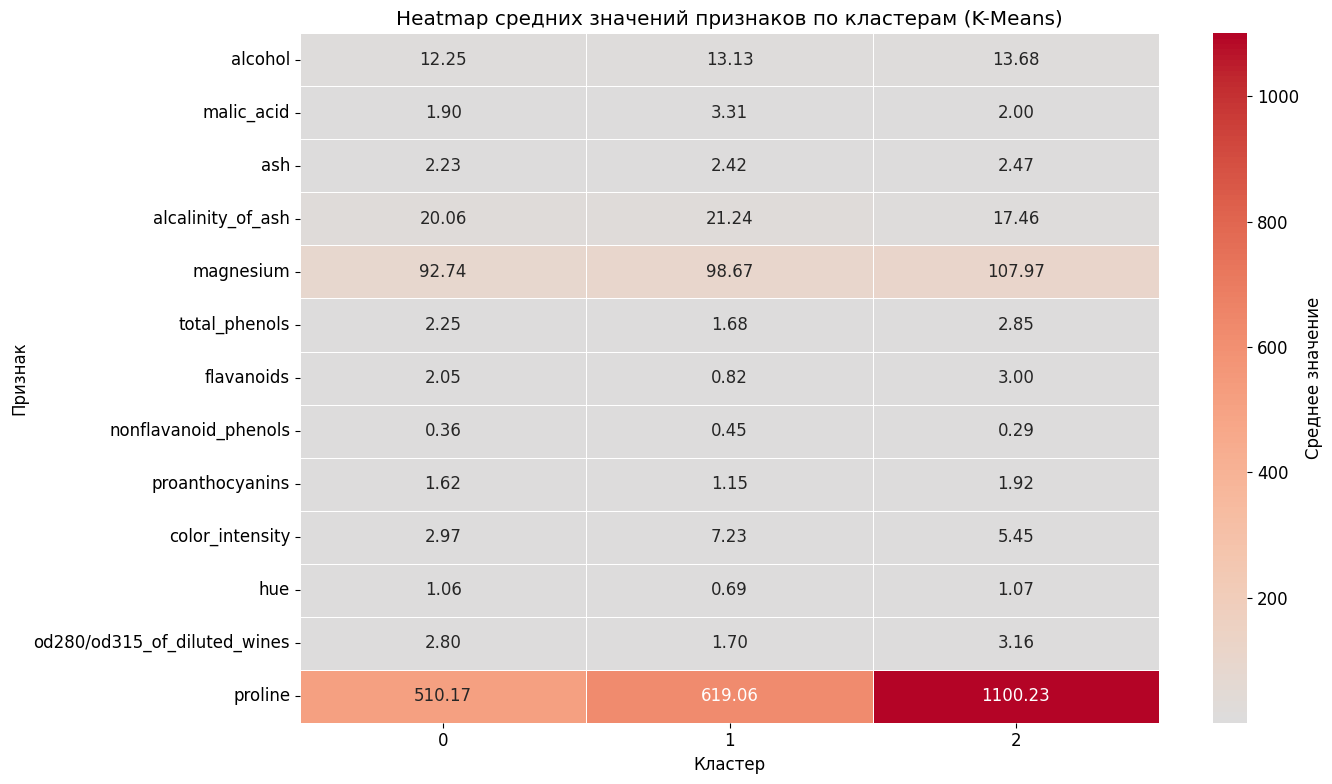

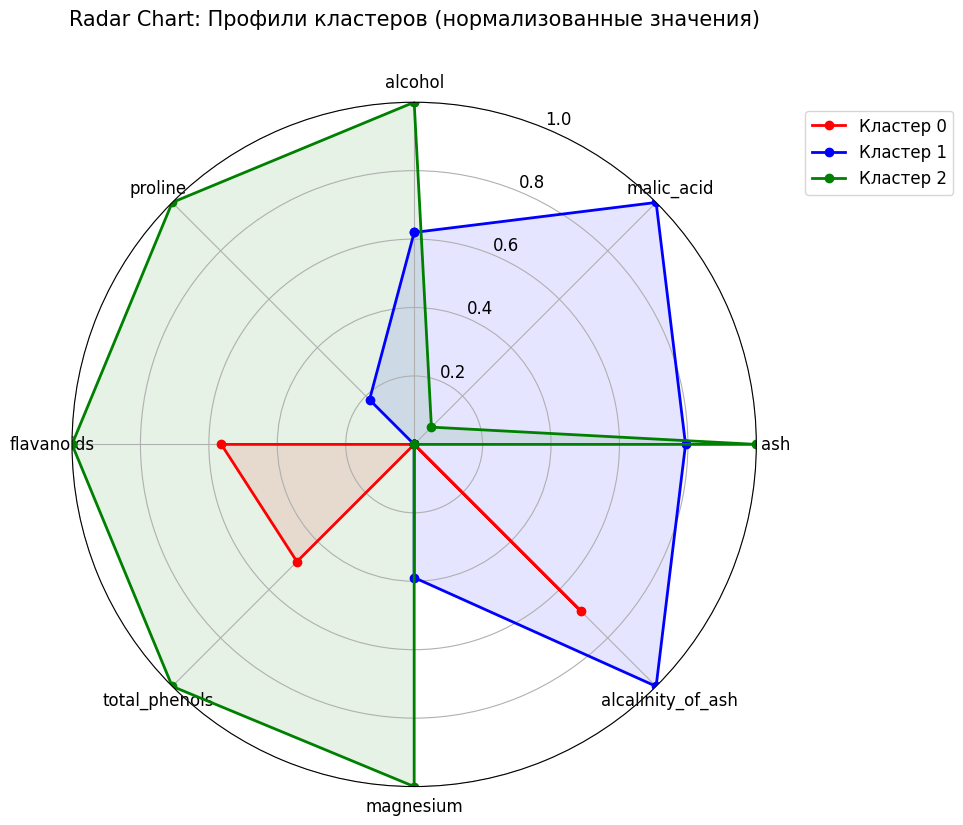

=== АНАЛИЗ ВАЖНЫХ ПРИЗНАКОВ ДЛЯ РАЗДЕЛЕНИЯ КЛАСТЕРОВ ===
Наиболее важные признаки для разделения кластеров:
  flavanoids: 3.397
  od280/od315_of_diluted_wines: 2.799
  proline: 2.213
  hue: 1.326
  total_phenols: 1.303
  alcohol: 1.192
  color_intensity: 1.174
  malic_acid: 0.462


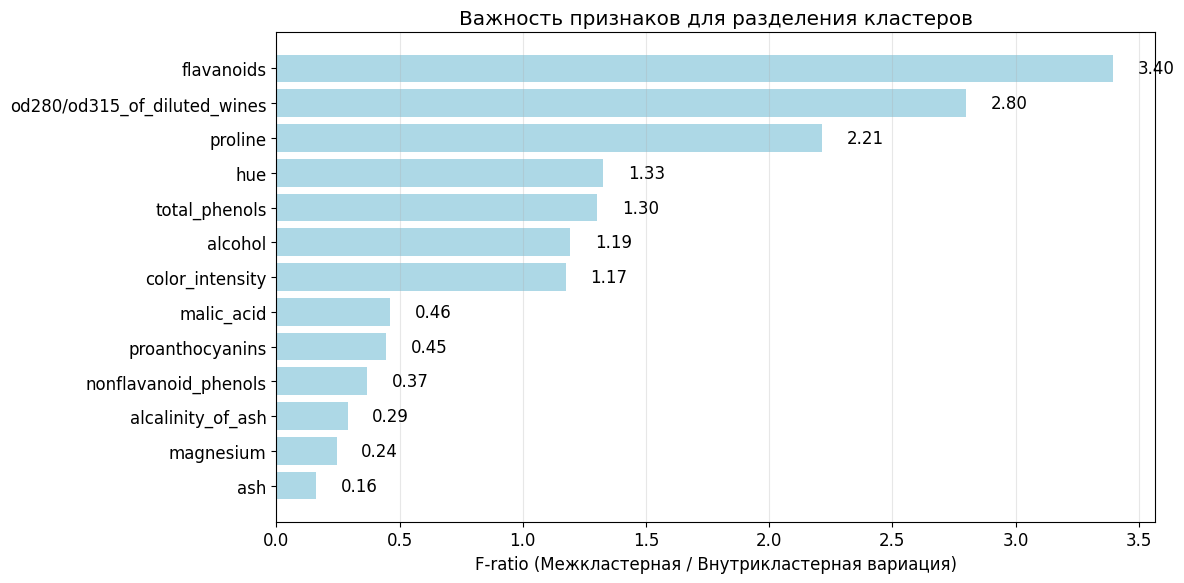

In [22]:
# ЗАДАЧА 8.2: Интерпретация кластеров
# Проанализируйте характеристики найденных кластеров

# ПОДСКАЗКА: Вычислите средние значения признаков по кластерам
# ПОДСКАЗКА: Создайте профили кластеров (radar charts)
# ПОДСКАЗКА: Определите наиболее важные признаки для разделения

# ВАШ КОД ЗДЕСЬ:
# 1. Для лучшего алгоритма создайте профили кластеров
# 2. Постройте heatmap средних значений по кластерам
# 3. Создайте radar chart для сравнения кластеров
# 4. Опишите характеристики каждого кластера словами


# ЗАДАНИЕ: Дайте интерпретацию каждому найденному кластеру


# Используем лучший алгоритм (K-Means)
best_result = clustering_results[0]  # K-Means показал лучшие результаты
best_labels = best_result['Labels']

# Создание DataFrame для анализа
cluster_analysis_df = df[feature_names].copy()
cluster_analysis_df['Cluster'] = best_labels
cluster_analysis_df['True_Class'] = y_true

# Вычисление средних значений по кластерам
cluster_means = cluster_analysis_df.groupby('Cluster')[feature_names].mean()
cluster_std = cluster_analysis_df.groupby('Cluster')[feature_names].std()

print("=== СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ ===")
print(cluster_means.round(3))

# Heatmap средних значений по кластерам
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Среднее значение'})
plt.title('Heatmap средних значений признаков по кластерам (K-Means)')
plt.xlabel('Кластер')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

# Radar chart для сравнения кластеров
from math import pi

# Нормализация данных для radar chart
def normalize_for_radar(data):
    normalized = (data - data.min()) / (data.max() - data.min())
    return normalized

# Выбираем наиболее информативные признаки для radar chart
selected_features_radar = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 
                          'magnesium', 'total_phenols', 'flavanoids', 'proline']

cluster_means_selected = cluster_means[selected_features_radar]
cluster_means_normalized = normalize_for_radar(cluster_means_selected)

# Подготовка данных для radar chart
categories = list(cluster_means_normalized.columns)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Замыкание круга

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['red', 'blue', 'green']
for i, (cluster, row) in enumerate(cluster_means_normalized.iterrows()):
    values = row.values.tolist()
    values += values[:1]  # Замыкание круга
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Кластер {cluster}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Настройка radar chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title('Radar Chart: Профили кластеров (нормализованные значения)', size=15, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

# Анализ наиболее важных признаков для разделения
print("=== АНАЛИЗ ВАЖНЫХ ПРИЗНАКОВ ДЛЯ РАЗДЕЛЕНИЯ КЛАСТЕРОВ ===")

# Вычисление различий между кластерами
feature_importance = {}
for feature in feature_names:
    # Дисперсия средних значений между кластерами
    between_cluster_variance = np.var(cluster_means[feature])
    # Средняя дисперсия внутри кластеров
    within_cluster_variance = np.mean(cluster_std[feature] ** 2)
    
    # F-ratio (межкластерная вариация / внутрикластерная вариация)
    if within_cluster_variance > 0:
        f_ratio = between_cluster_variance / within_cluster_variance
    else:
        f_ratio = between_cluster_variance
    
    feature_importance[feature] = f_ratio

# Сортировка признаков по важности
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Наиболее важные признаки для разделения кластеров:")
for feature, importance in sorted_features[:8]:
    print(f"  {feature}: {importance:.3f}")

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
features_sorted = [f[0] for f in sorted_features]
importance_sorted = [f[1] for f in sorted_features]

bars = plt.barh(features_sorted, importance_sorted, color='lightblue')
plt.xlabel('F-ratio (Межкластерная / Внутрикластерная вариация)')
plt.title('Важность признаков для разделения кластеров')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Добавление значений на столбцы
for bar, value in zip(bars, importance_sorted):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()